In [76]:
%%time
import torch
import torch.nn as nn
torch.set_default_tensor_type('torch.cuda.FloatTensor')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

CPU times: total: 0 ns
Wall time: 997 µs


In [77]:
x = torch.linspace(0,799,800)

In [78]:
y = torch.sin(x*2*3.1416/40)

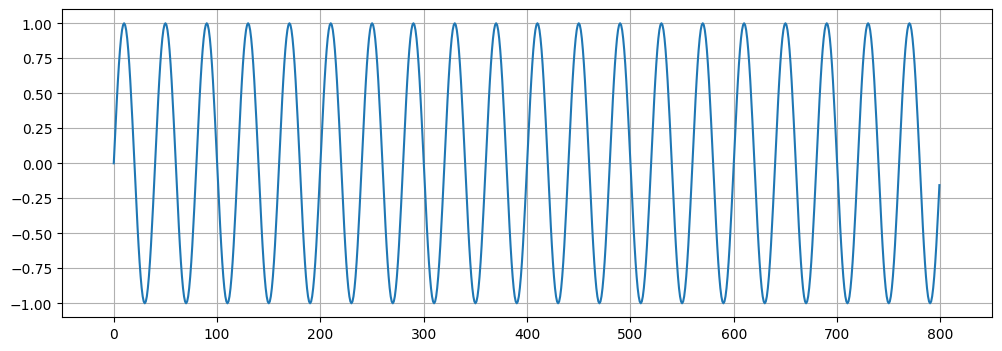

In [79]:
plt.figure(figsize=(12,4))
plt.xlim(-50,850)
plt.grid(True)
plt.plot(y.cpu().numpy())

In [80]:
test_size = 40
train_set = y[:-test_size]
test_set = y[-test_size:]

In [81]:
test_set.shape

torch.Size([40])

In [82]:
train_set.shape

torch.Size([760])

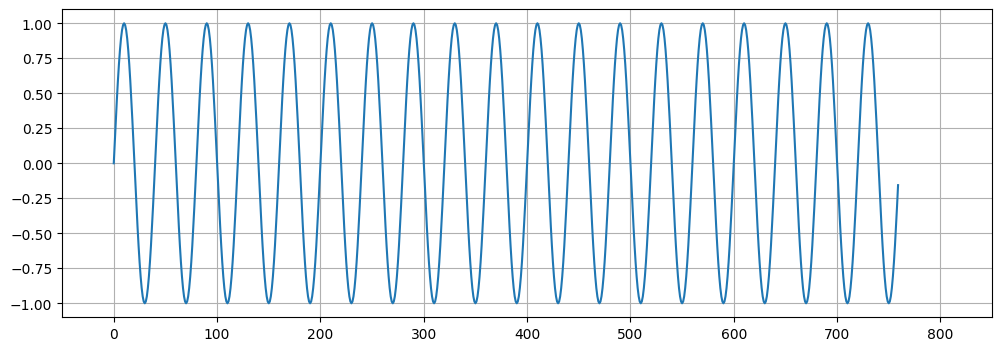

In [83]:
plt.figure(figsize=(12,4))
plt.xlim(-50,850)
plt.grid(True)
plt.plot(train_set.cpu().numpy())

In [84]:
def input_data(seq,ws):
    
    out = list()
    L = len(seq)
    for i in range(L-ws):
        window = seq[i:i+ws]
        label = seq[i+ws:i+ws+1]
        out.append((window,label))
    
    return out

In [85]:
window_size = 40
train_data = input_data(train_set,window_size)

In [86]:
train_data[1]

(tensor([ 1.5643e-01,  3.0902e-01,  4.5399e-01,  5.8779e-01,  7.0711e-01,
          8.0902e-01,  8.9101e-01,  9.5106e-01,  9.8769e-01,  1.0000e+00,
          9.8769e-01,  9.5106e-01,  8.9100e-01,  8.0901e-01,  7.0710e-01,
          5.8778e-01,  4.5398e-01,  3.0901e-01,  1.5643e-01, -7.2400e-06,
         -1.5644e-01, -3.0902e-01, -4.5400e-01, -5.8779e-01, -7.0711e-01,
         -8.0902e-01, -8.9101e-01, -9.5106e-01, -9.8769e-01, -1.0000e+00,
         -9.8769e-01, -9.5105e-01, -8.9100e-01, -8.0901e-01, -7.0710e-01,
         -5.8777e-01, -4.5398e-01, -3.0900e-01, -1.5642e-01,  1.4480e-05]),
 tensor([0.1564]))

In [87]:
len(train_data)

720

In [88]:
class LSTM(nn.Module):
    def __init__(self,input_size=1,hidden_size=50,output_size=1):        
        super().__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size,hidden_size)
        self.linear = nn.Linear(hidden_size,output_size)
        
        self.hidden = torch.stack((torch.zeros(1,1,hidden_size).to(device),torch.zeros(1,1,hidden_size).to(device)))
        
    def forward(self,seq):
        lstm_out, self.hidden = self.lstm(seq.view(len(seq.to(device)),1,-1).to(device),
                                          self.hidden)
        
        pred = self.linear(lstm_out.view(len(seq),-1))
        
        return pred[-1]

In [89]:
# class LSTM(nn.Module):
#     def __init__(self, input_size=1, hidden_size=50, out_size=1):
#         super().__init__()
#         self.hidden_size = hidden_size
        
#         # Add an LSTM layer:
#         self.lstm = nn.LSTM(input_size,hidden_size)
        
#         # Add a fully-connected layer:
#         self.linear = nn.Linear(hidden_size,out_size)
        
#         # Initialize h0 and c0:
#         self.hidden = (torch.zeros(1,1,hidden_size),
#                        torch.zeros(1,1,hidden_size))
    
#     def forward(self,seq):
#         lstm_out, self.hidden = self.lstm(
#             seq.view(len(seq), 1, -1), self.hidden)
#         pred = self.linear(lstm_out.view(len(seq),-1))
#         return pred[-1]   # we only care about the last prediction

In [90]:
device = torch.device('cpu')
model = LSTM()
model
torch.manual_seed(42)
PATH = "LSTM.pt"

# Save
torch.save(model.state_dict(), PATH)

# Load
device = torch.device('cuda')

In [91]:
torch.manual_seed(42)
model = LSTM()
model.load_state_dict(torch.load(PATH))
model.to(device)
model
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)

In [92]:
model

LSTM(
  (lstm): LSTM(1, 50)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)

In [93]:
for p in model.parameters():
    p
    print(p.numel())

200
10000
200
200
50
1


Epoch:  1 Loss: 0.08457302
Loss on test predictions: 0.6143814921379089


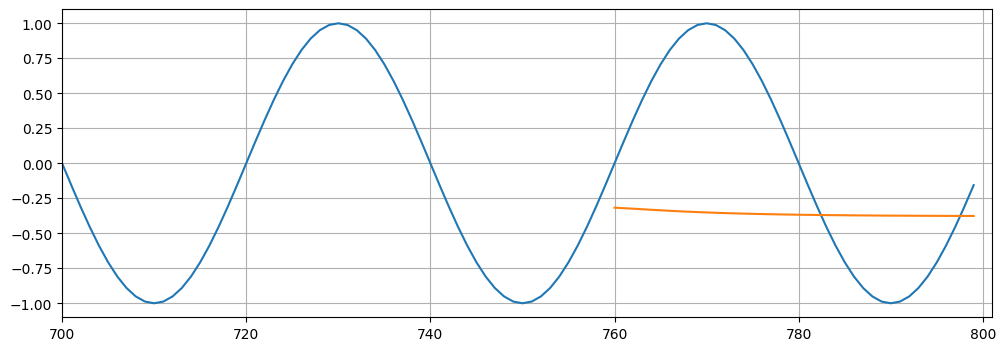

Epoch:  2 Loss: 0.05596759
Loss on test predictions: 0.5598928332328796


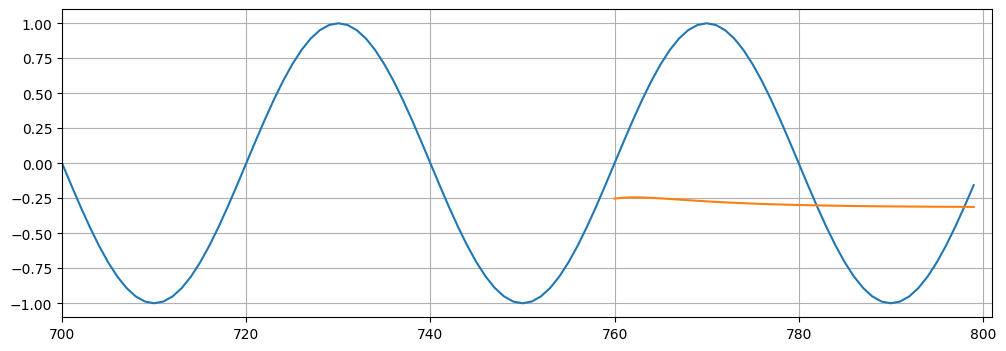

Epoch:  3 Loss: 0.02750510
Loss on test predictions: 0.47359713912010193


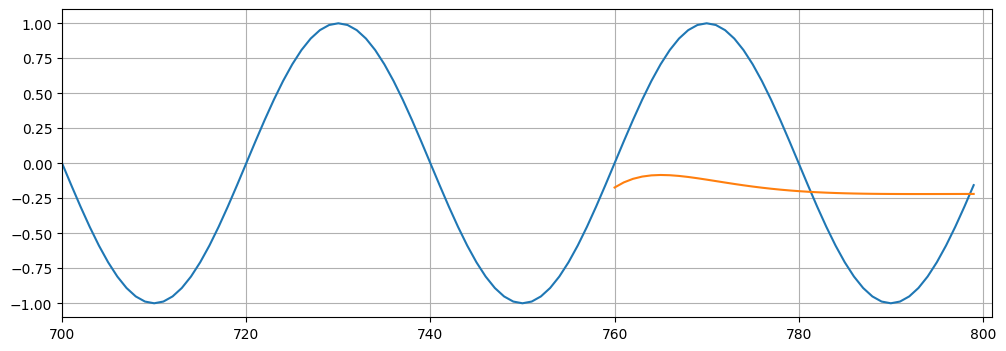

Epoch:  4 Loss: 0.00544050
Loss on test predictions: 0.22132717072963715


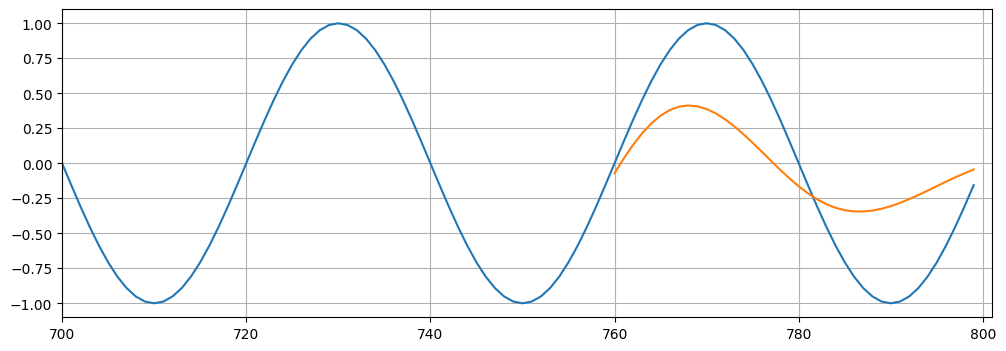

Epoch:  5 Loss: 0.00067036
Loss on test predictions: 0.014204311184585094


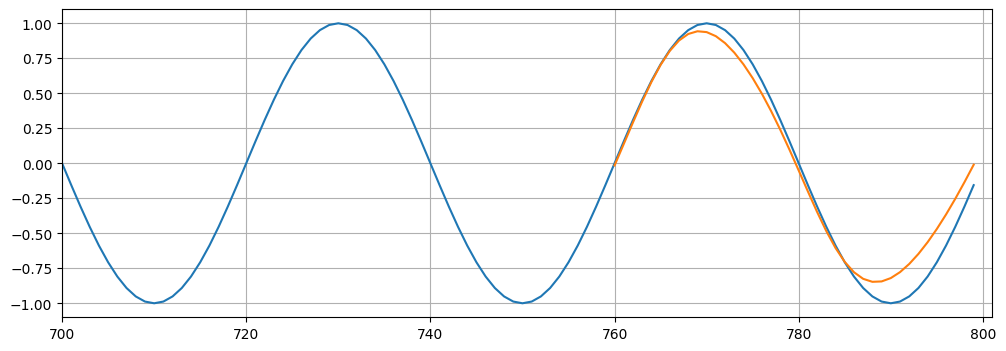

Epoch:  6 Loss: 0.00027053
Loss on test predictions: 0.0032556664664298296


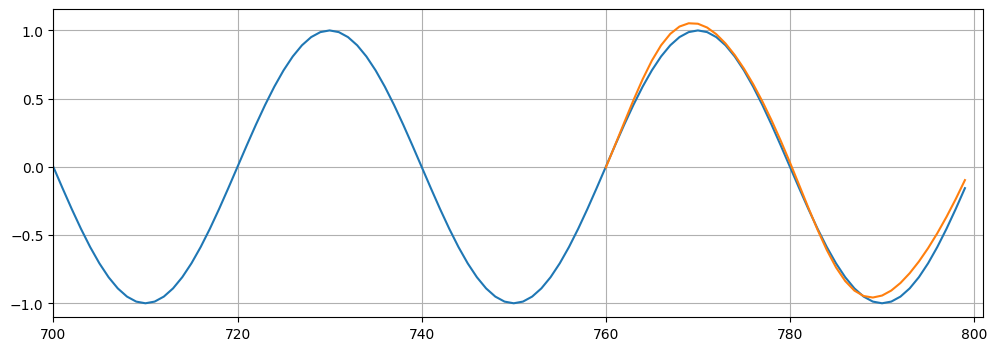

Epoch:  7 Loss: 0.00020615
Loss on test predictions: 0.002939427038654685


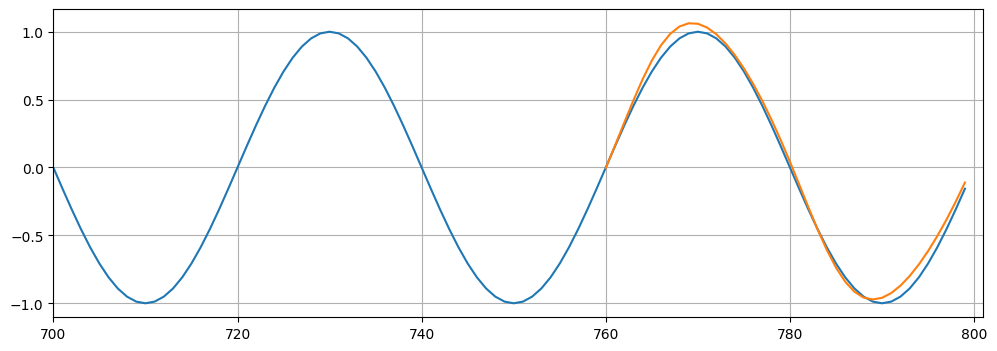

Epoch:  8 Loss: 0.00017597
Loss on test predictions: 0.0027528253849595785


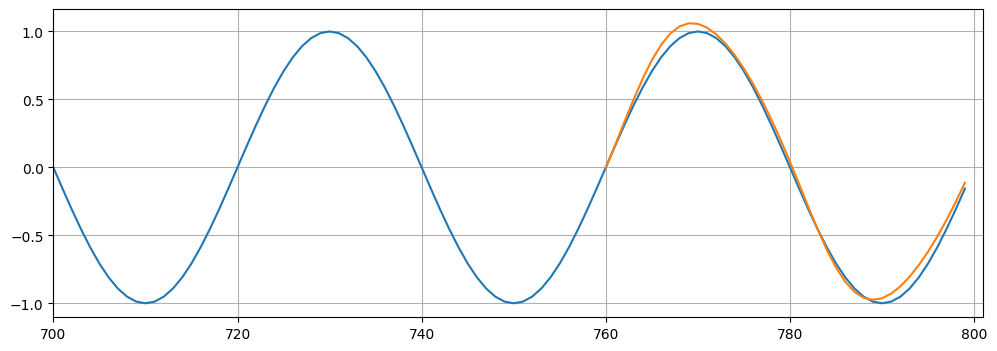

Epoch:  9 Loss: 0.00015341
Loss on test predictions: 0.0025950404815375805


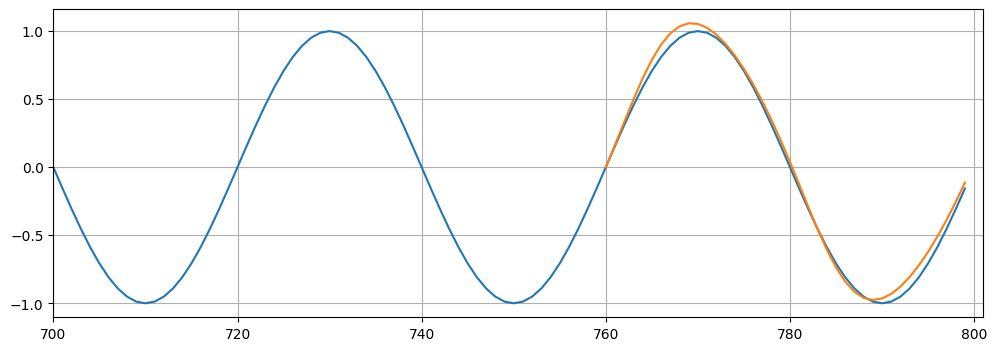

Epoch: 10 Loss: 0.00013496
Loss on test predictions: 0.002463816199451685


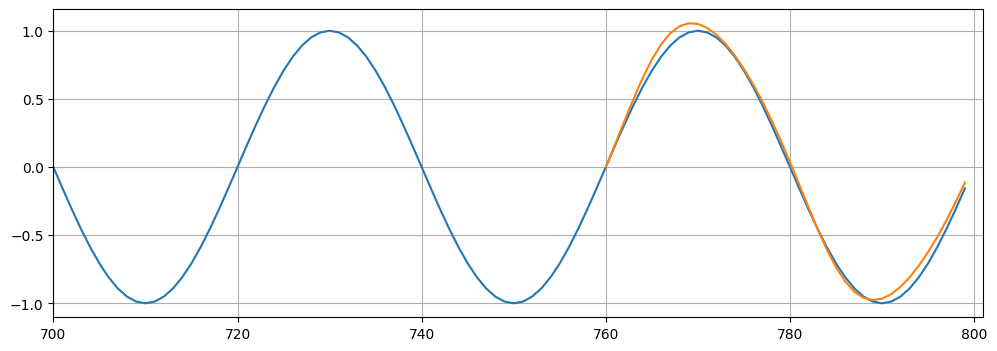

Epoch: 11 Loss: 0.00011961
Loss on test predictions: 0.002354121534153819


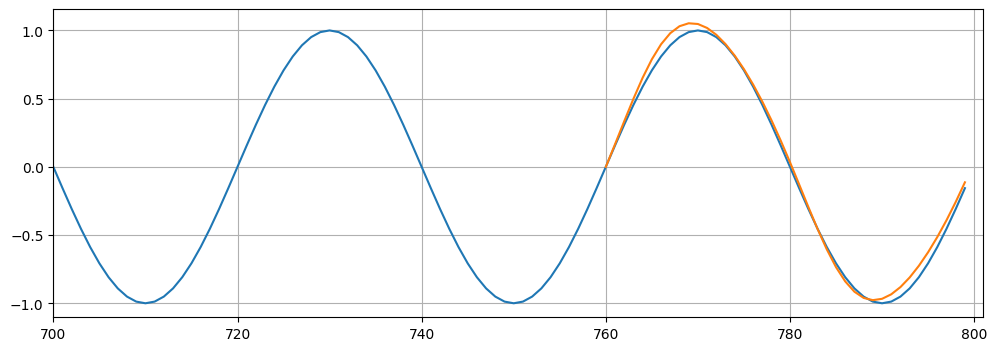

Epoch: 12 Loss: 0.00010674
Loss on test predictions: 0.002261662855744362


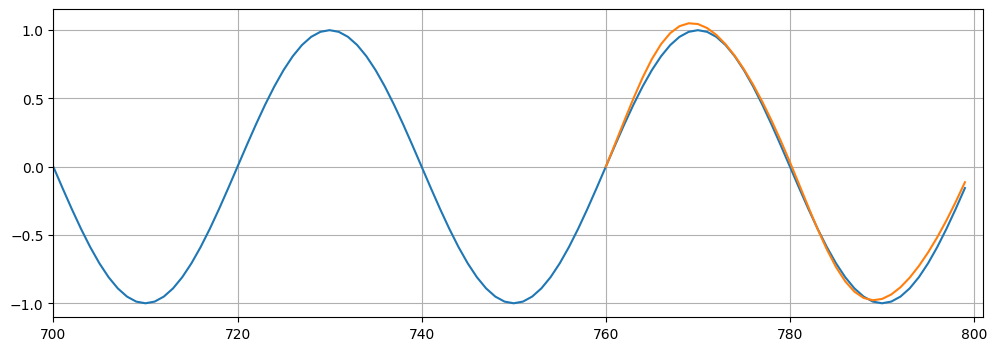

Epoch: 13 Loss: 0.00009587
Loss on test predictions: 0.002183003118261695


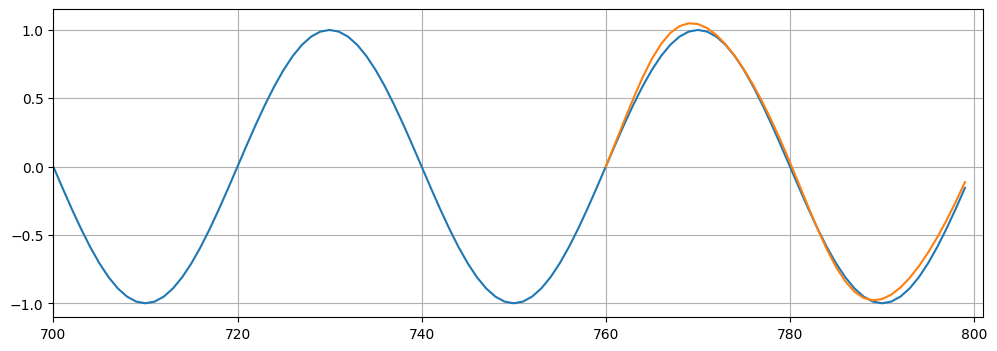

Epoch: 14 Loss: 0.00008665
Loss on test predictions: 0.0021155336871743202


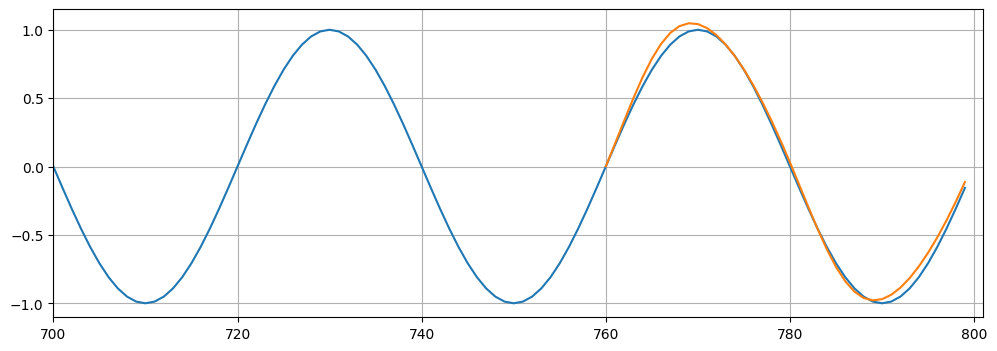

Epoch: 15 Loss: 0.00007877
Loss on test predictions: 0.002057052915915847


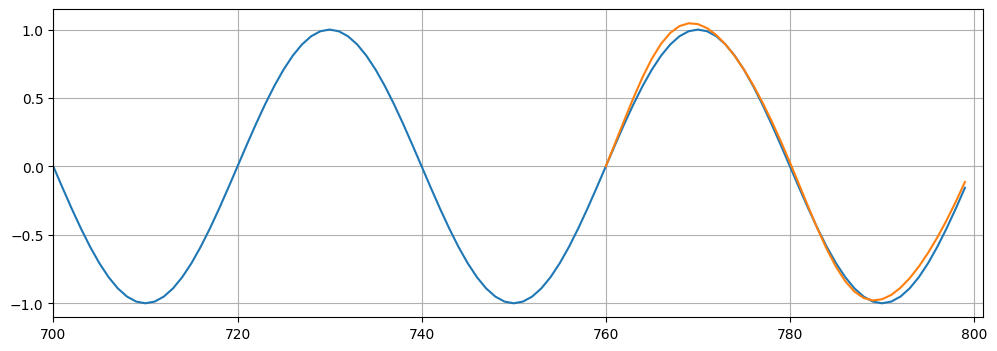

Epoch: 16 Loss: 0.00007200
Loss on test predictions: 0.0020059135276824236


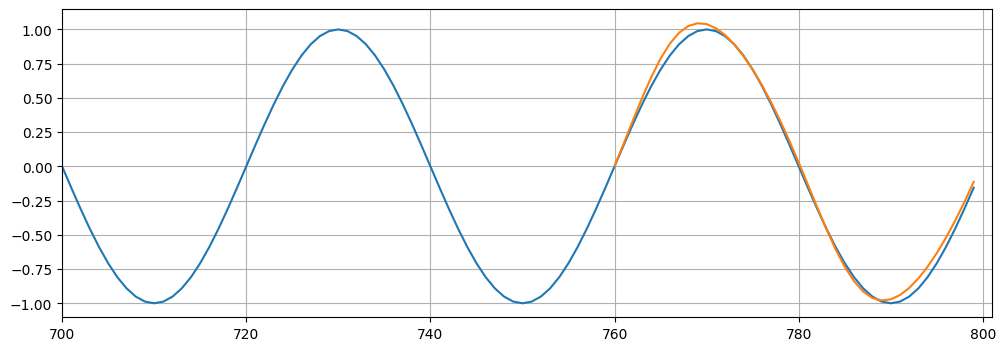

Epoch: 17 Loss: 0.00006615
Loss on test predictions: 0.0019606759306043386


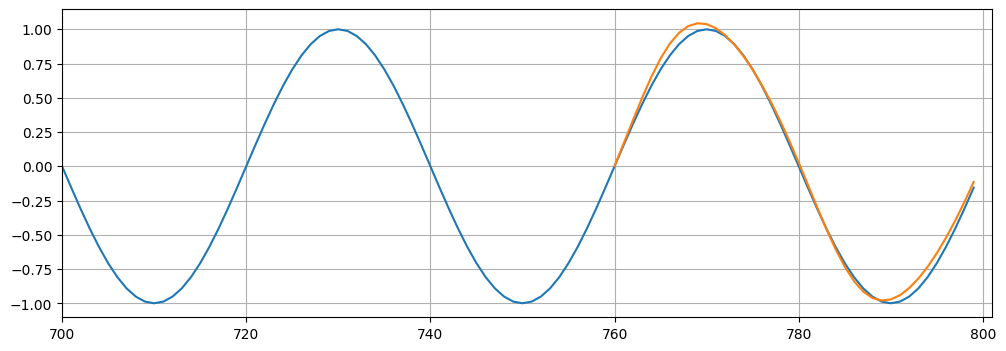

Epoch: 18 Loss: 0.00006107
Loss on test predictions: 0.0019203325500711799


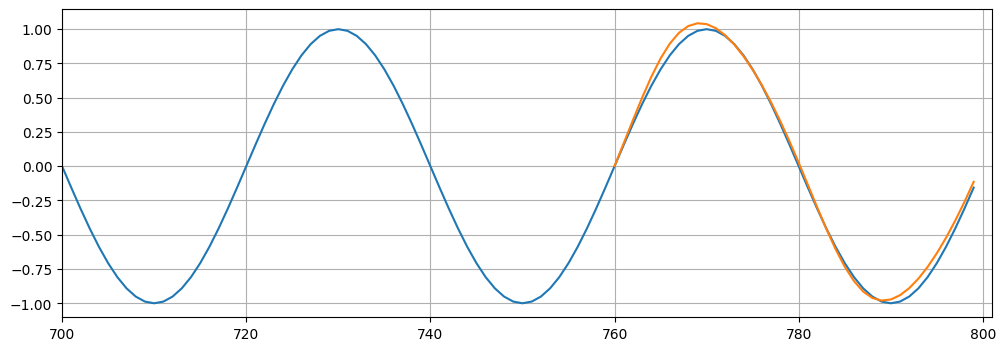

Epoch: 19 Loss: 0.00005663
Loss on test predictions: 0.001884025172330439


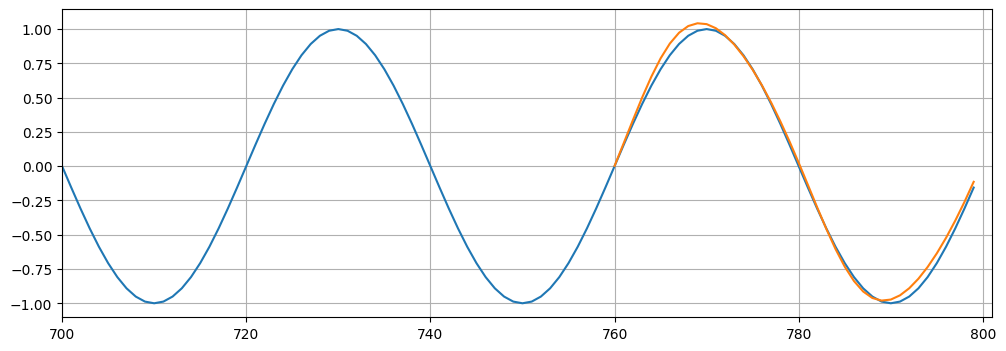

Epoch: 20 Loss: 0.00005274
Loss on test predictions: 0.0018510179361328483


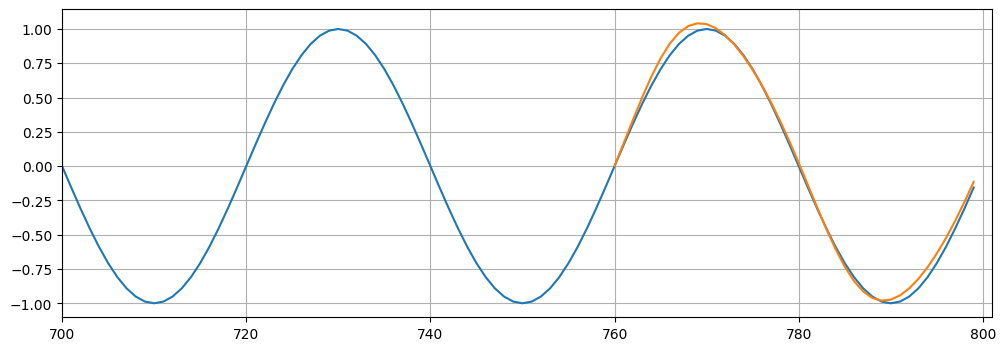

Epoch: 21 Loss: 0.00004930
Loss on test predictions: 0.0018207936082035303


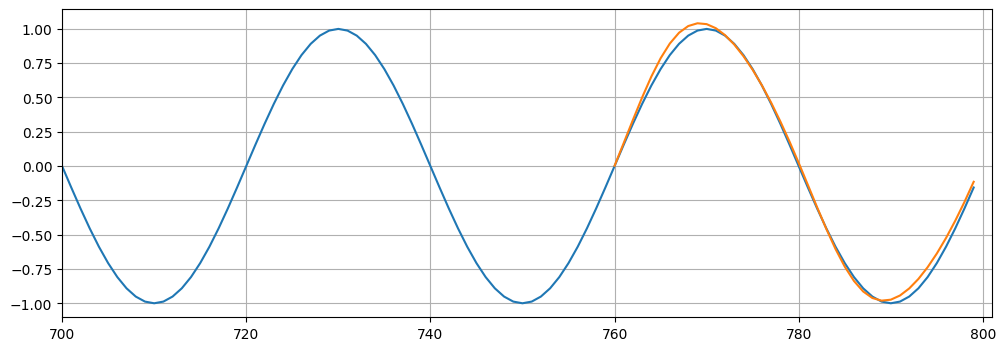

Epoch: 22 Loss: 0.00004626
Loss on test predictions: 0.001792881521396339


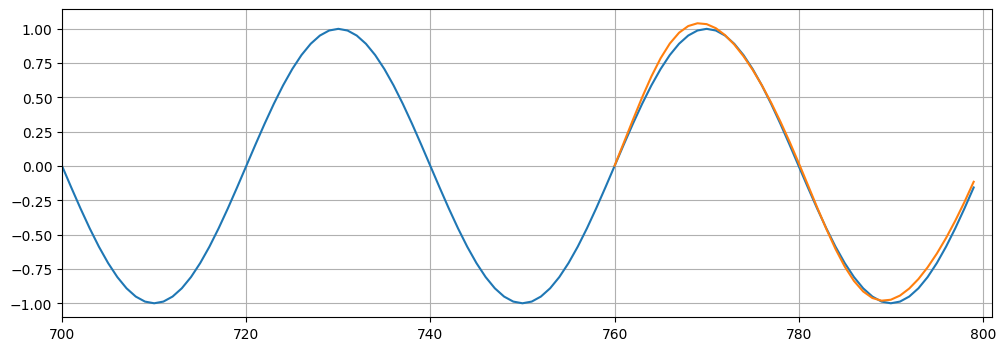

Epoch: 23 Loss: 0.00004355
Loss on test predictions: 0.0017668905202299356


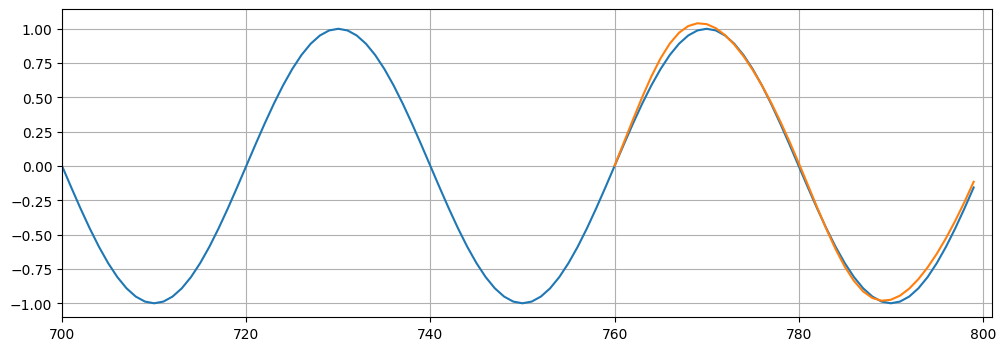

Epoch: 24 Loss: 0.00004112
Loss on test predictions: 0.001742554479278624


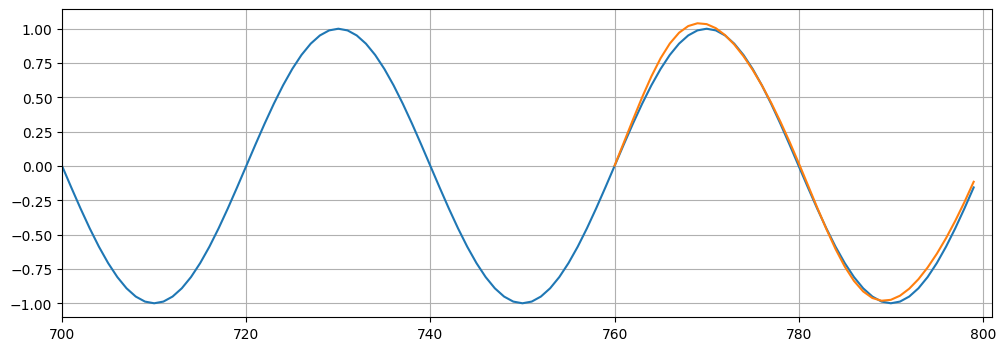

Epoch: 25 Loss: 0.00003894
Loss on test predictions: 0.0017196586122736335


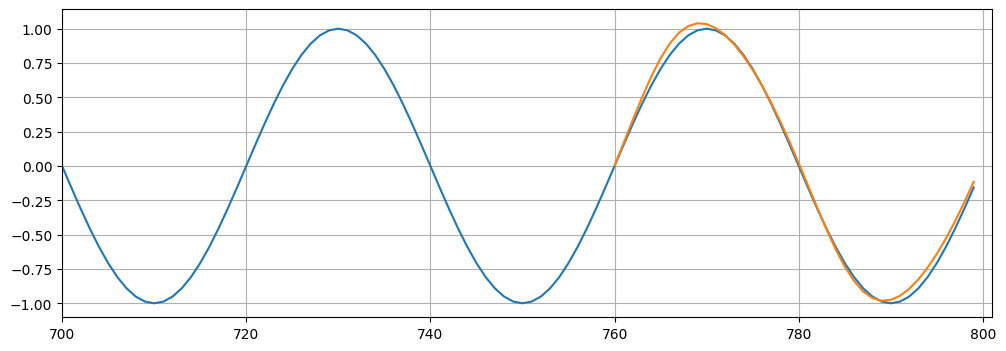

Epoch: 26 Loss: 0.00003697
Loss on test predictions: 0.001697926432825625


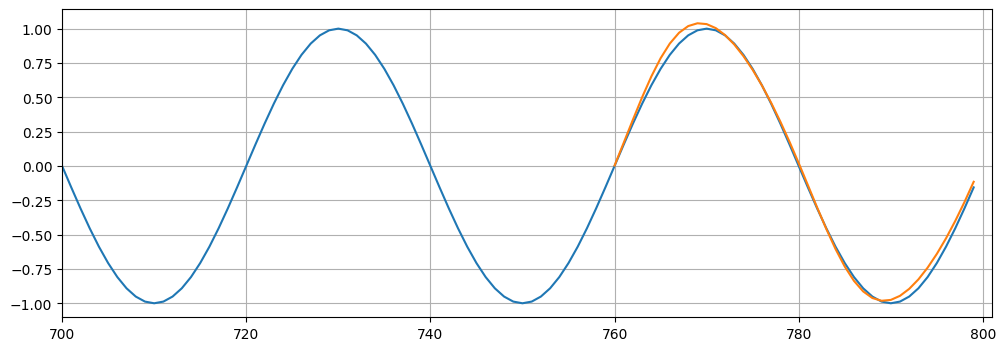

Epoch: 27 Loss: 0.00003519
Loss on test predictions: 0.001677227090112865


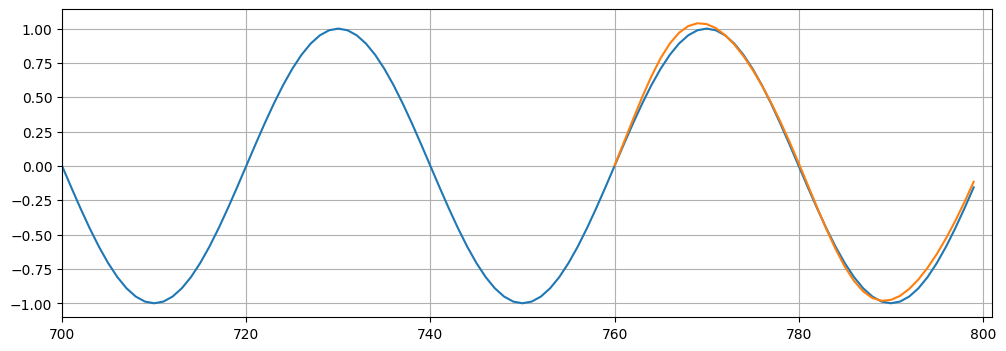

Epoch: 28 Loss: 0.00003357
Loss on test predictions: 0.0016574636101722717


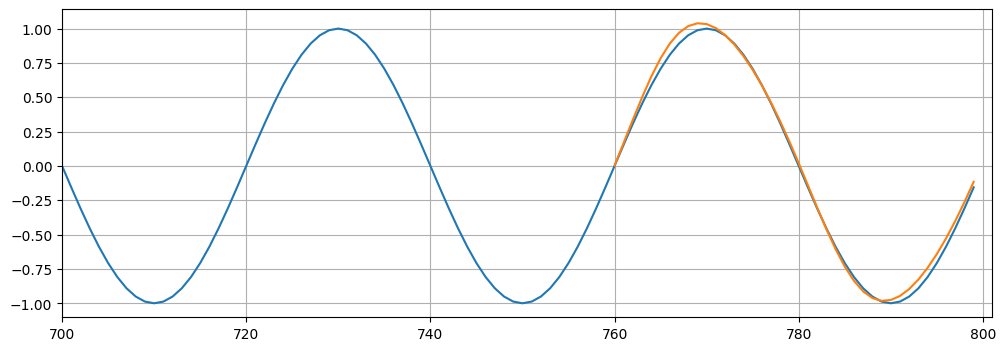

Epoch: 29 Loss: 0.00003208
Loss on test predictions: 0.001638463931158185


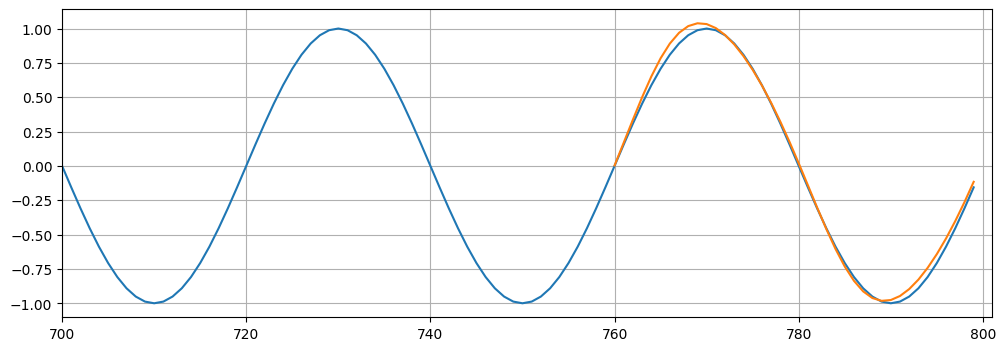

Epoch: 30 Loss: 0.00003072
Loss on test predictions: 0.001620196970179677


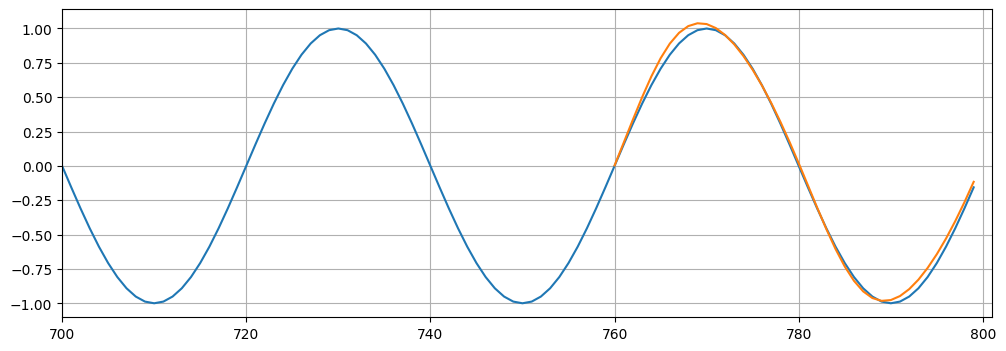

Epoch: 31 Loss: 0.00002947
Loss on test predictions: 0.0016025126678869128


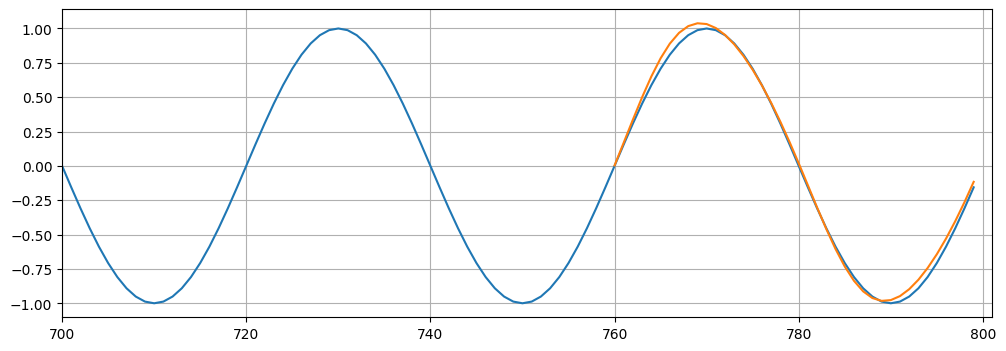

Epoch: 32 Loss: 0.00002831
Loss on test predictions: 0.0015854643424972892


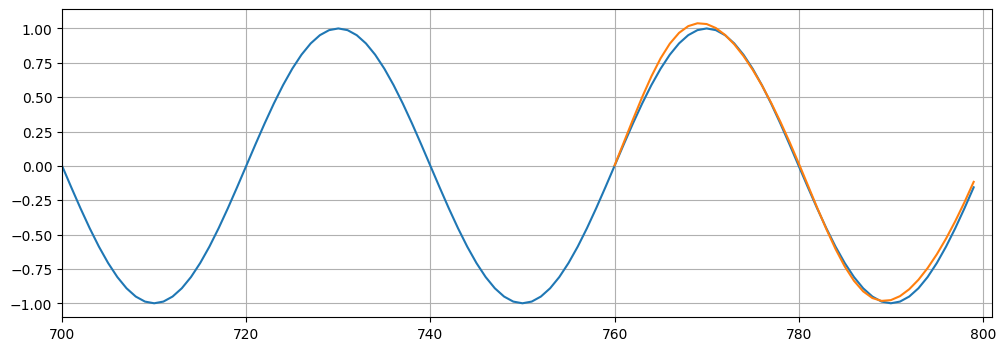

Epoch: 33 Loss: 0.00002724
Loss on test predictions: 0.0015688230050727725


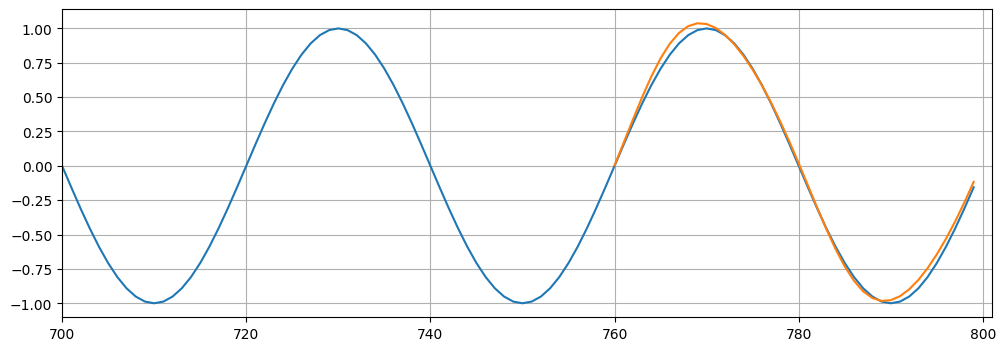

Epoch: 34 Loss: 0.00002625
Loss on test predictions: 0.001552677364088595


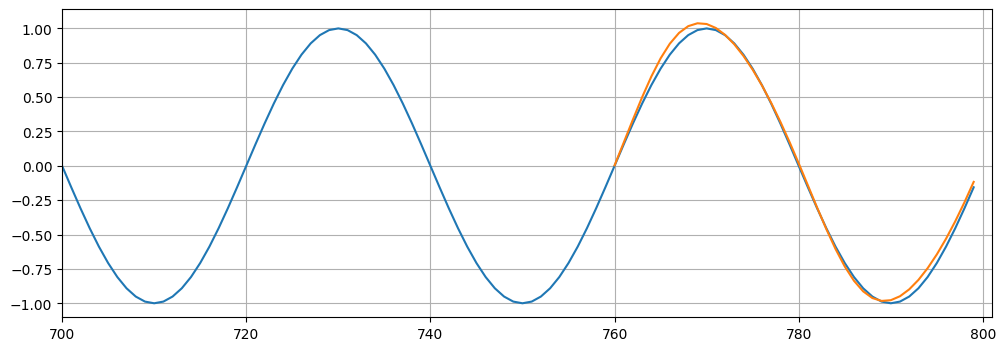

Epoch: 35 Loss: 0.00002532
Loss on test predictions: 0.0015370006440207362


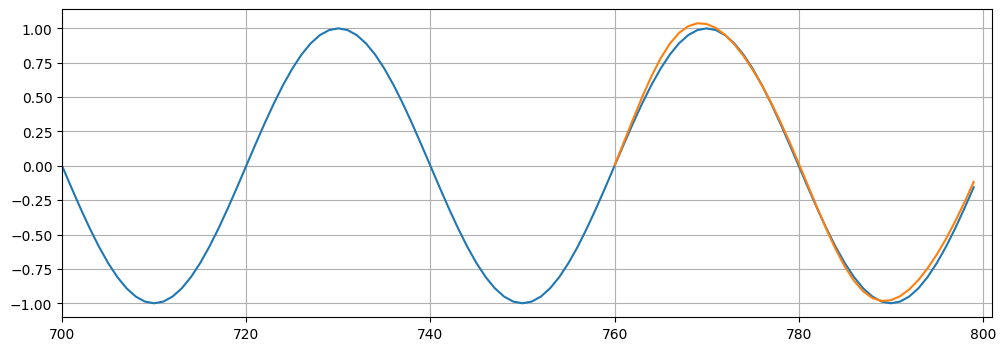

Epoch: 36 Loss: 0.00002445
Loss on test predictions: 0.0015216247411444783


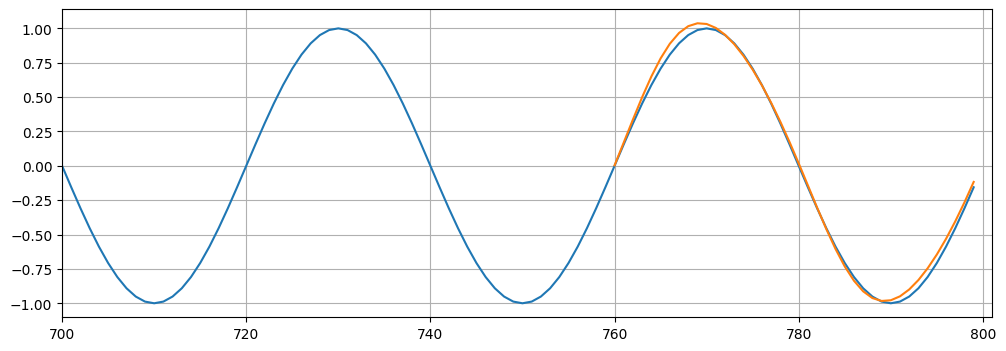

Epoch: 37 Loss: 0.00002364
Loss on test predictions: 0.0015066838823258877


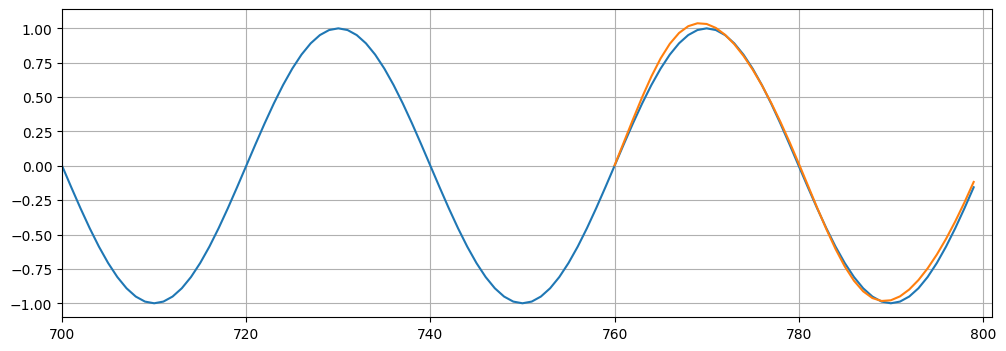

Epoch: 38 Loss: 0.00002287
Loss on test predictions: 0.0014920702669769526


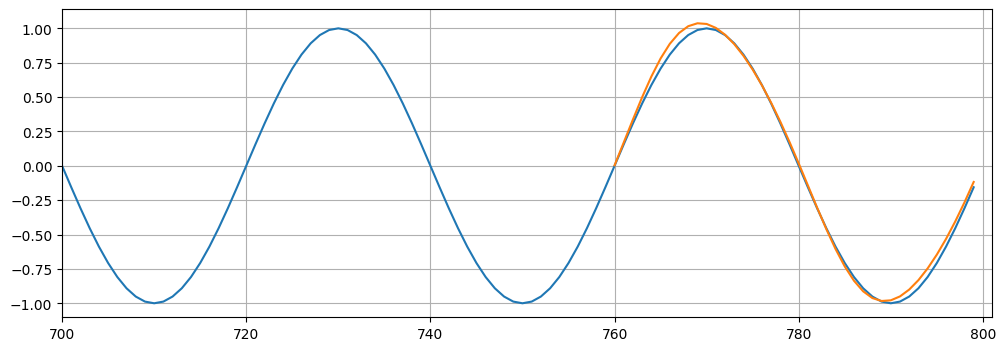

Epoch: 39 Loss: 0.00002215
Loss on test predictions: 0.0014777391916140914


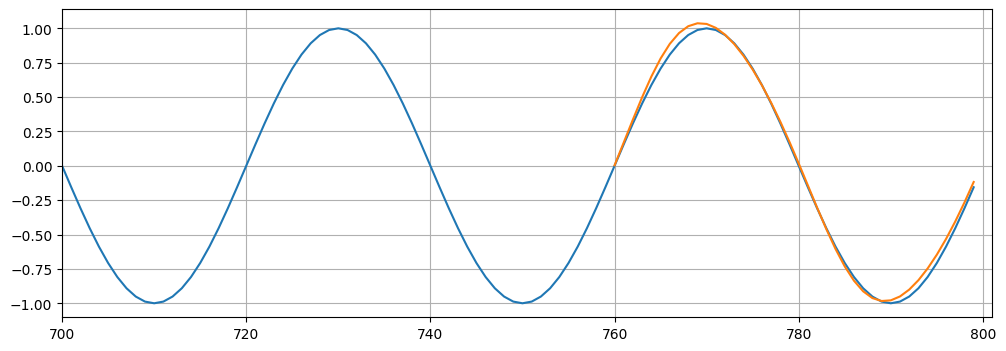

Epoch: 40 Loss: 0.00002147
Loss on test predictions: 0.001463711610995233


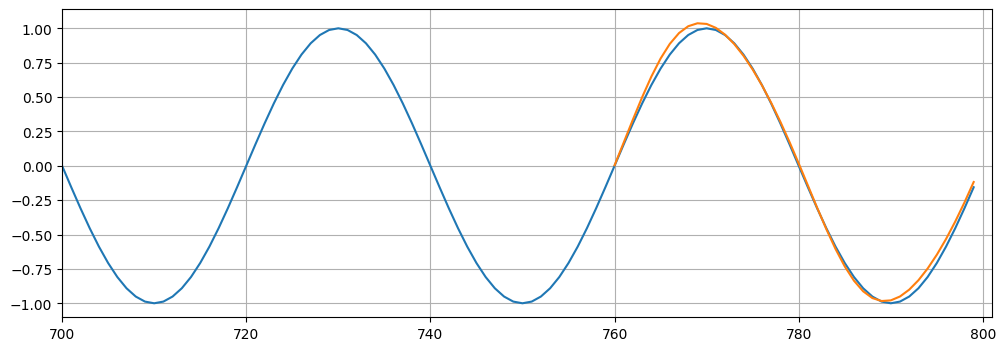

Epoch: 41 Loss: 0.00002083
Loss on test predictions: 0.001450002659112215


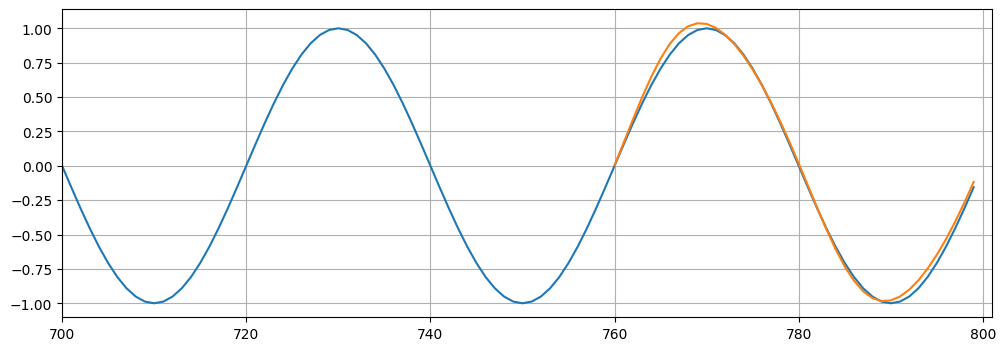

Epoch: 42 Loss: 0.00002022
Loss on test predictions: 0.0014365060487762094


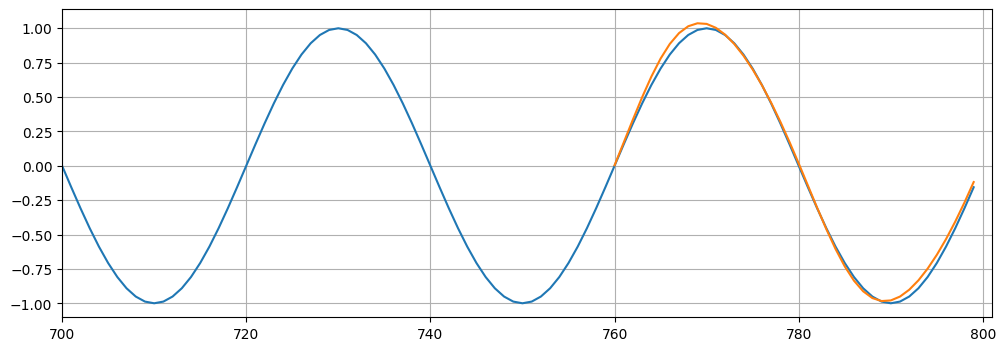

Epoch: 43 Loss: 0.00001964
Loss on test predictions: 0.0014232929097488523


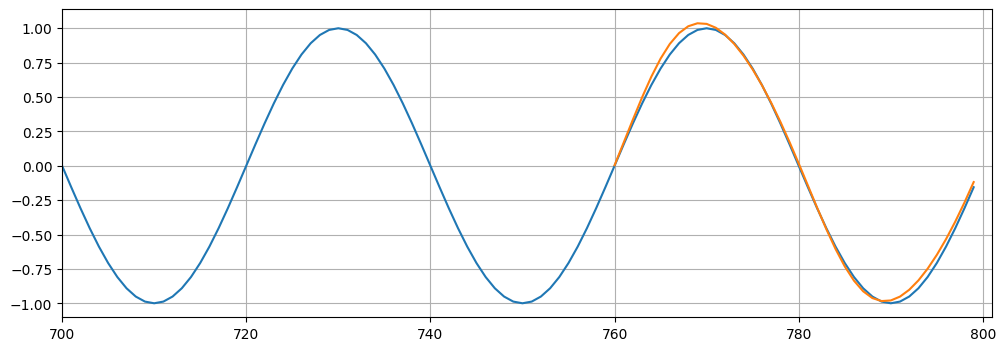

Epoch: 44 Loss: 0.00001909
Loss on test predictions: 0.001410331460647285


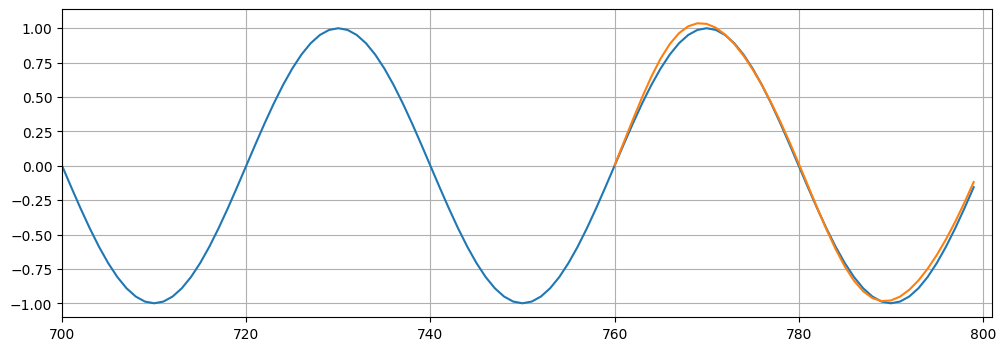

Epoch: 45 Loss: 0.00001856
Loss on test predictions: 0.0013976161135360599


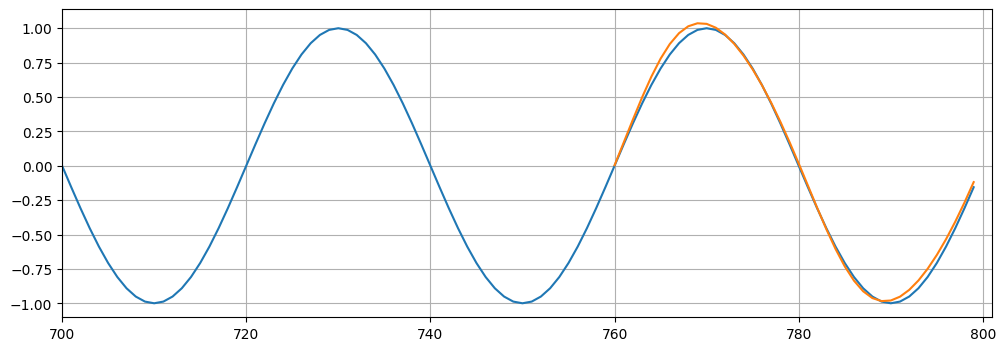

Epoch: 46 Loss: 0.00001806
Loss on test predictions: 0.0013851174153387547


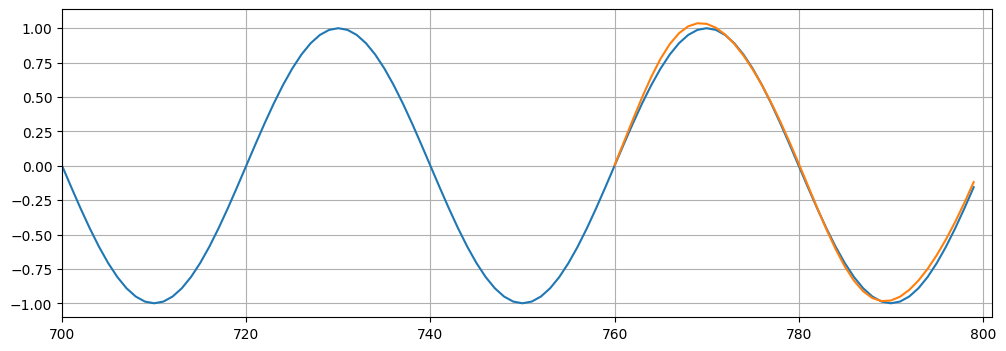

Epoch: 47 Loss: 0.00001758
Loss on test predictions: 0.0013728324556723237


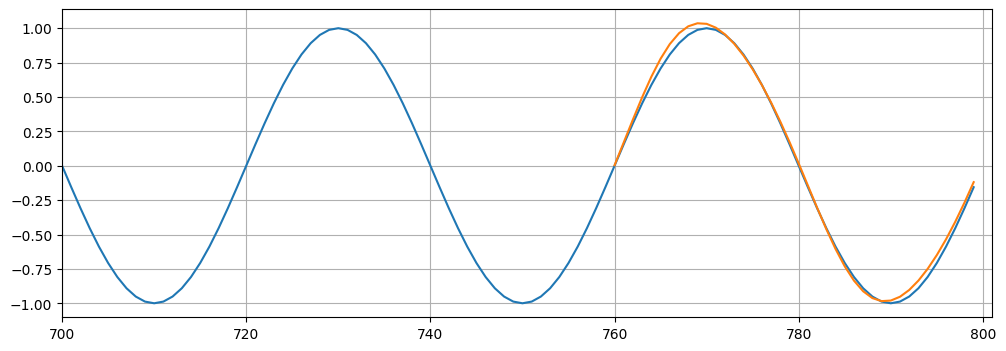

Epoch: 48 Loss: 0.00001713
Loss on test predictions: 0.0013607802102342248


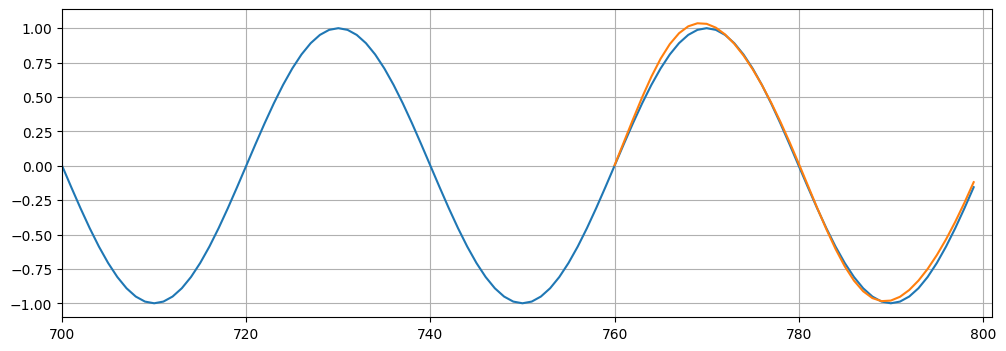

Epoch: 49 Loss: 0.00001669
Loss on test predictions: 0.001348931691609323


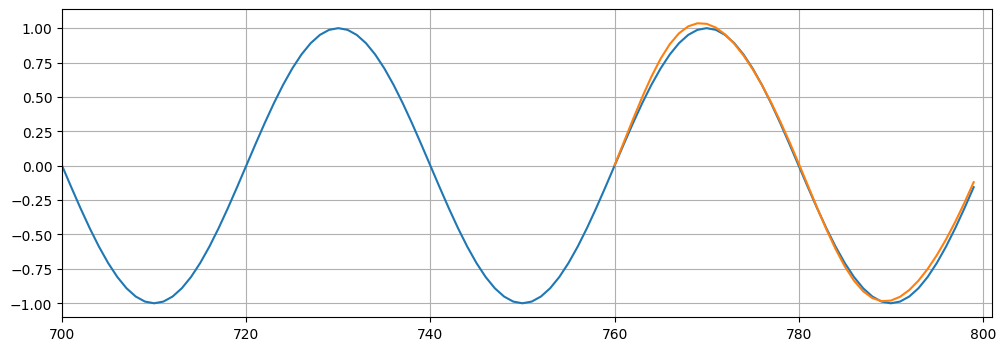

Epoch: 50 Loss: 0.00001627
Loss on test predictions: 0.0013372981920838356


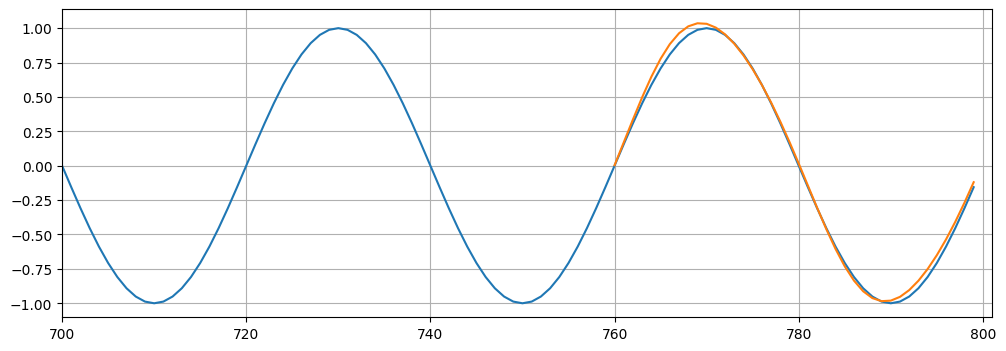

Epoch: 51 Loss: 0.00001586
Loss on test predictions: 0.0013258616672828794


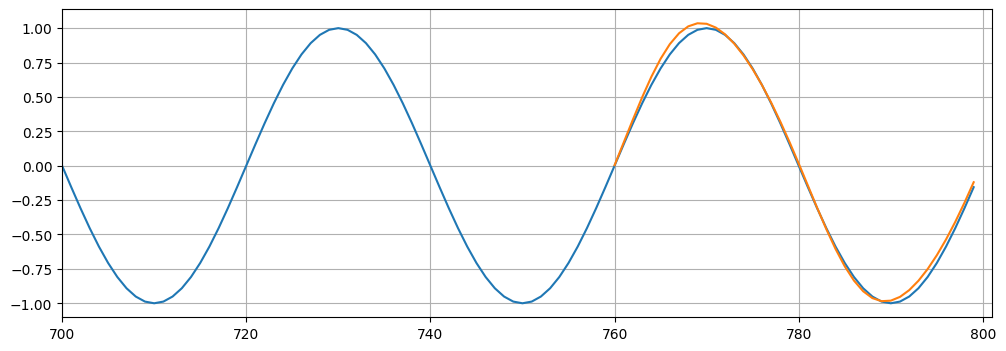

Epoch: 52 Loss: 0.00001548
Loss on test predictions: 0.001314598717726767


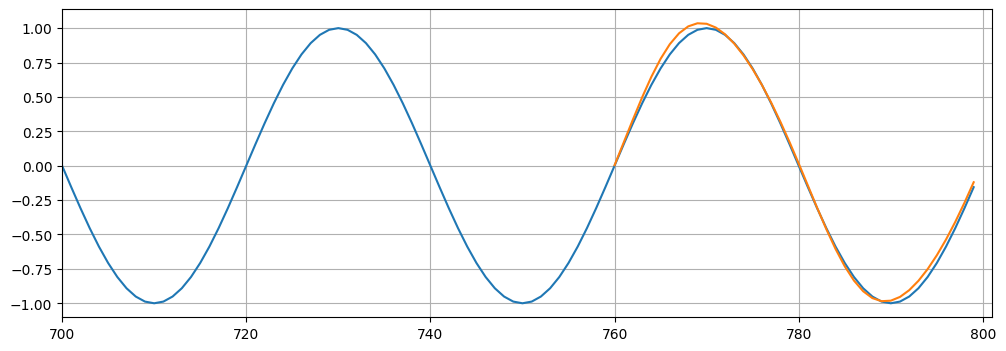

Epoch: 53 Loss: 0.00001510
Loss on test predictions: 0.0013035258743911982


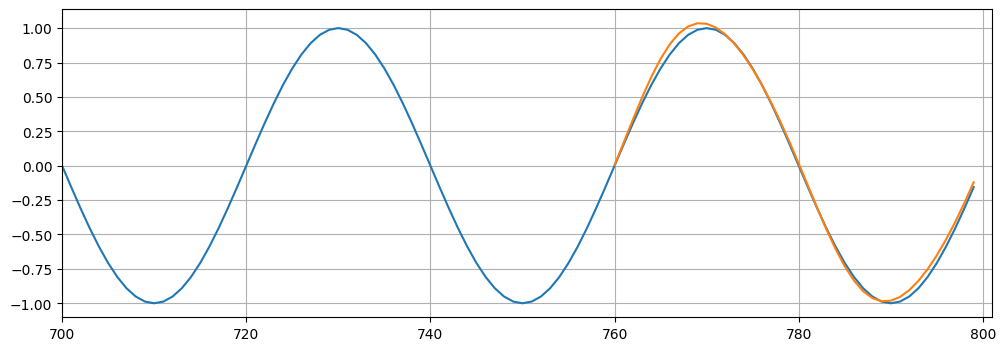

Epoch: 54 Loss: 0.00001474
Loss on test predictions: 0.0012926472118124366


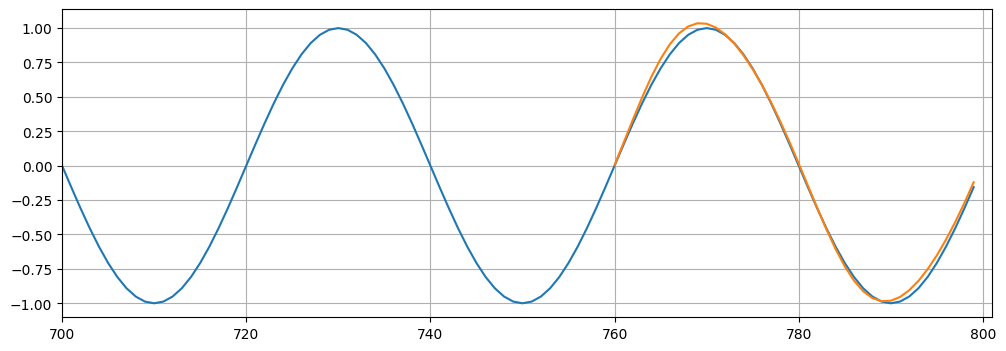

Epoch: 55 Loss: 0.00001440
Loss on test predictions: 0.0012819477124139667


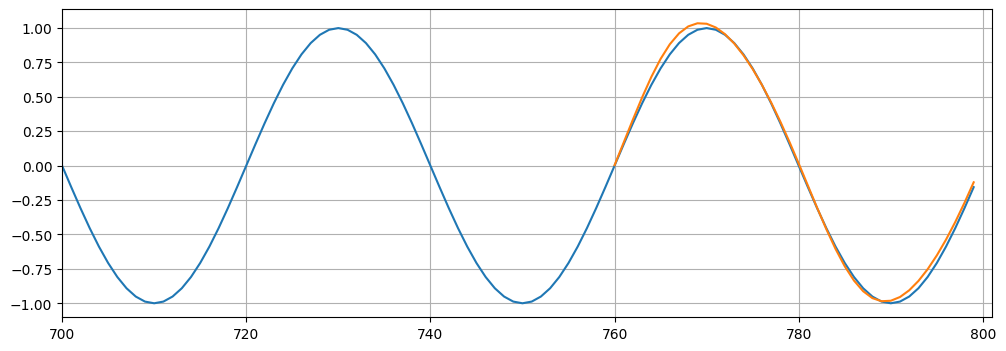

Epoch: 56 Loss: 0.00001406
Loss on test predictions: 0.0012714284239336848


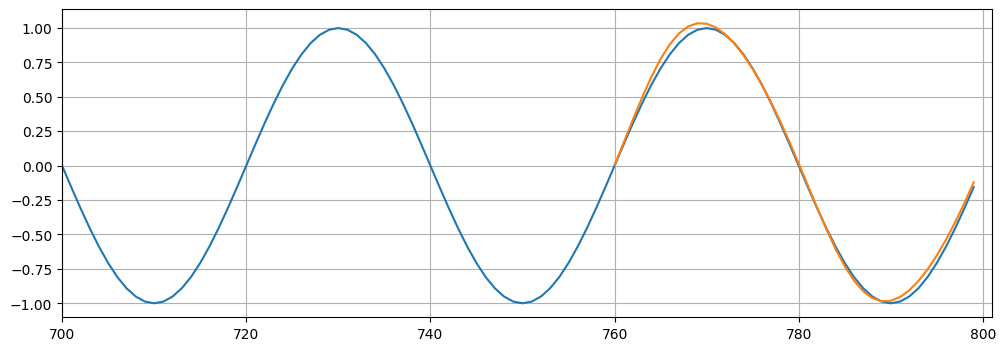

Epoch: 57 Loss: 0.00001374
Loss on test predictions: 0.0012610856210812926


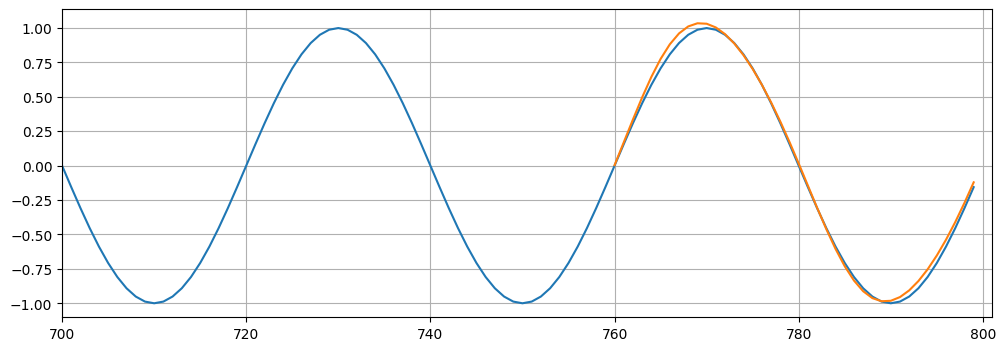

Epoch: 58 Loss: 0.00001343
Loss on test predictions: 0.001250888453796506


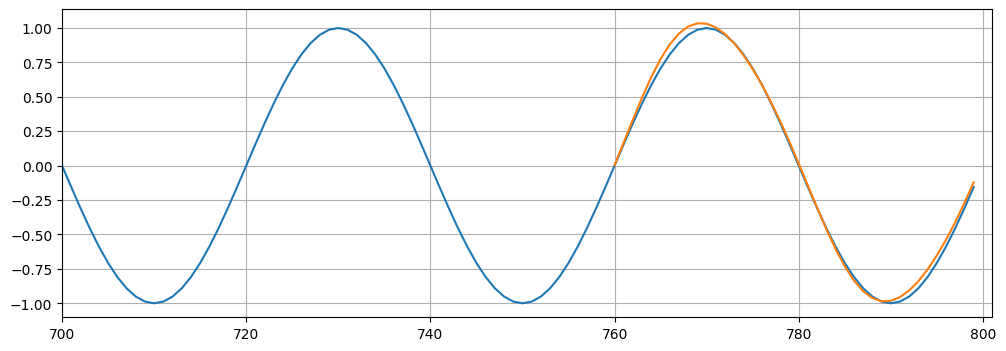

Epoch: 59 Loss: 0.00001313
Loss on test predictions: 0.0012408222537487745


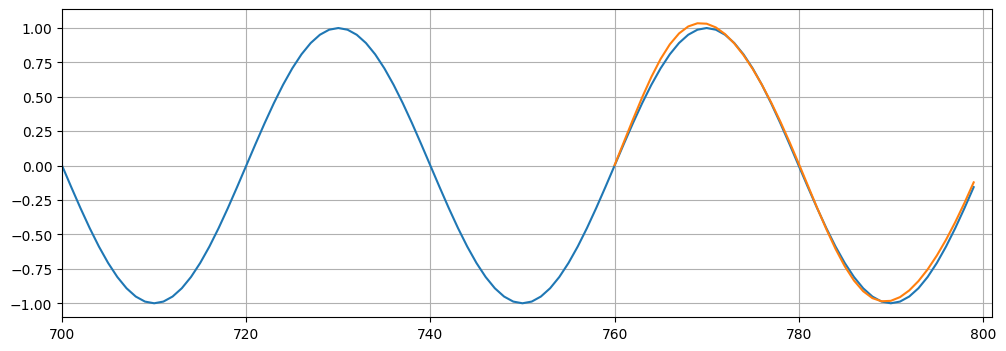

Epoch: 60 Loss: 0.00001284
Loss on test predictions: 0.001230985508300364


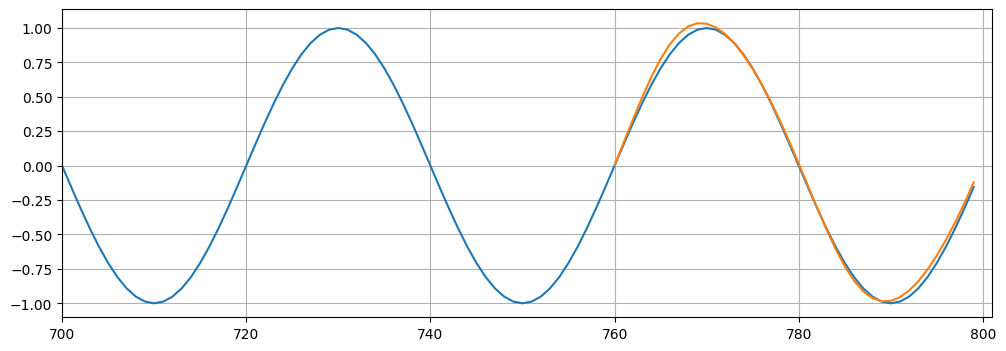

Epoch: 61 Loss: 0.00001256
Loss on test predictions: 0.001221235143020749


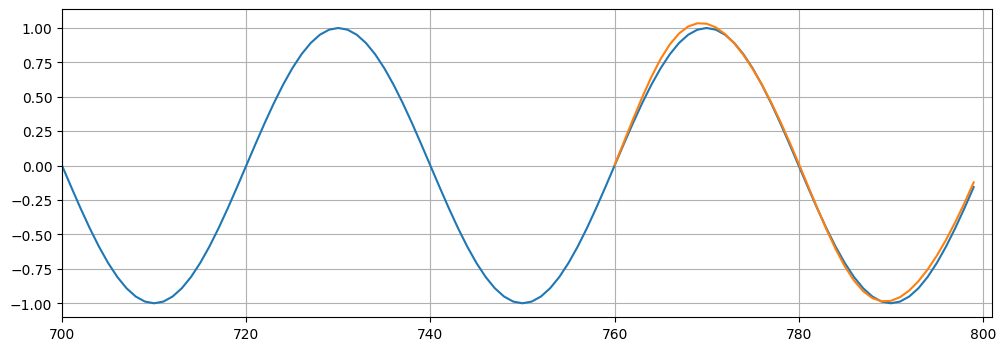

Epoch: 62 Loss: 0.00001229
Loss on test predictions: 0.0012116979341953993


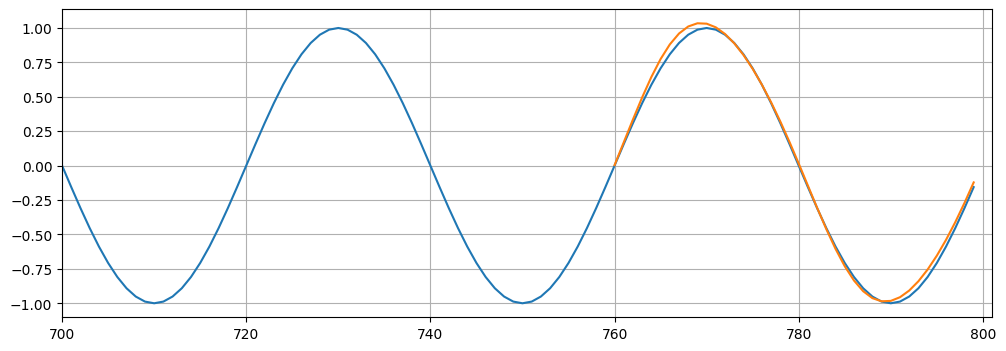

Epoch: 63 Loss: 0.00001203
Loss on test predictions: 0.0012022744631394744


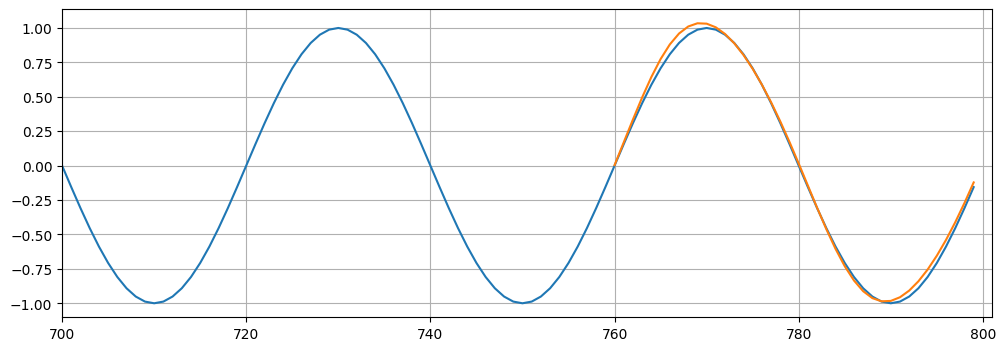

Epoch: 64 Loss: 0.00001177
Loss on test predictions: 0.001192988594993949


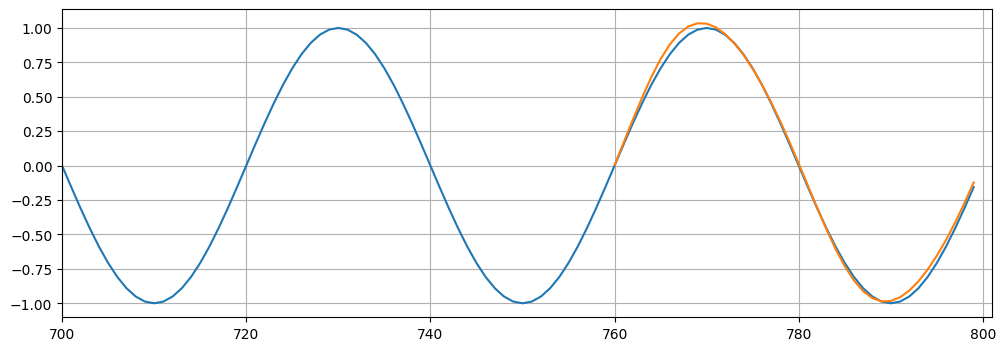

Epoch: 65 Loss: 0.00001153
Loss on test predictions: 0.0011838676873594522


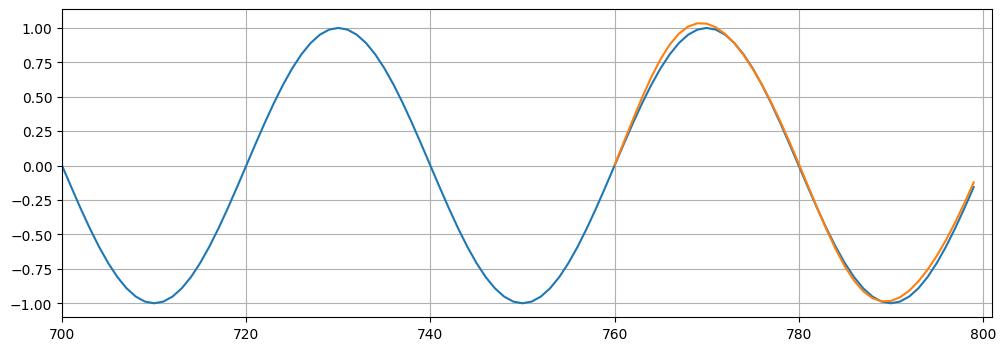

Epoch: 66 Loss: 0.00001129
Loss on test predictions: 0.001174876932054758


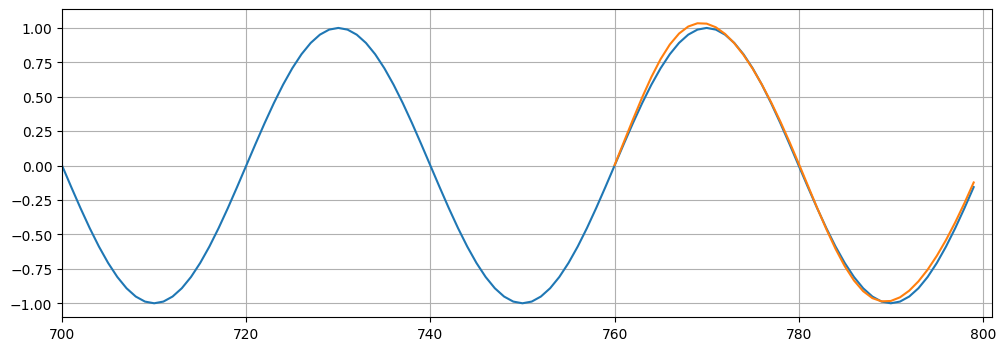

Epoch: 67 Loss: 0.00001106
Loss on test predictions: 0.001166031346656382


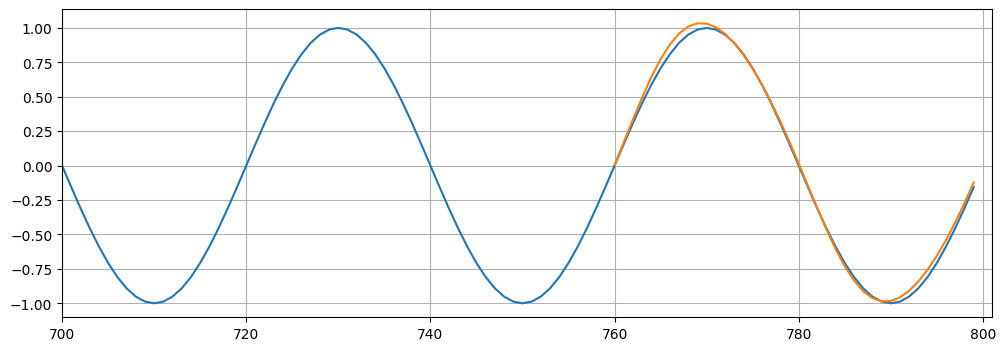

Epoch: 68 Loss: 0.00001083
Loss on test predictions: 0.0011573084630072117


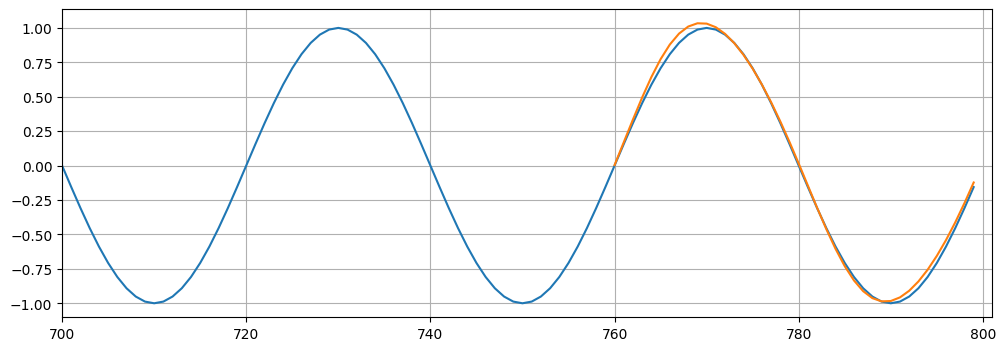

Epoch: 69 Loss: 0.00001061
Loss on test predictions: 0.0011487322626635432


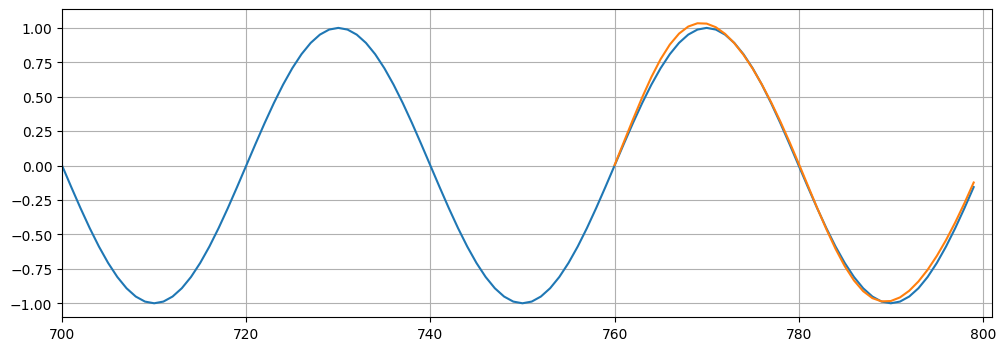

Epoch: 70 Loss: 0.00001040
Loss on test predictions: 0.0011402787640690804


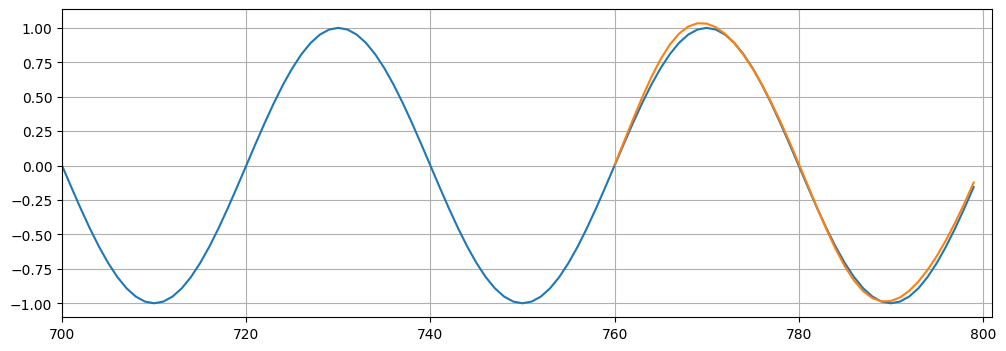

Epoch: 71 Loss: 0.00001020
Loss on test predictions: 0.0011319307377561927


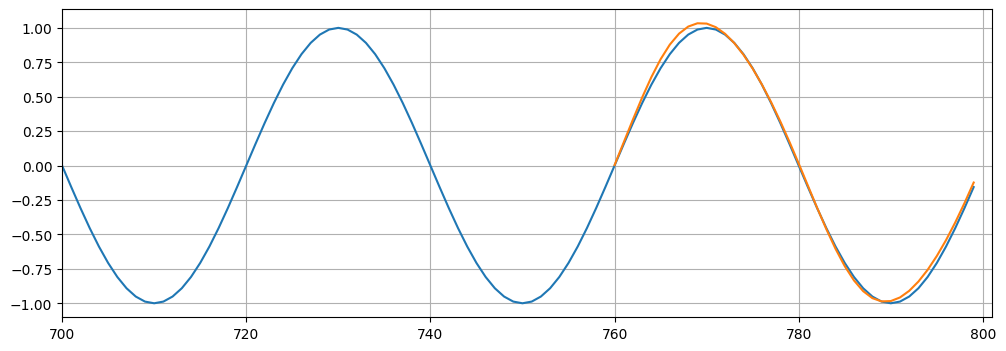

Epoch: 72 Loss: 0.00001000
Loss on test predictions: 0.0011237107682973146


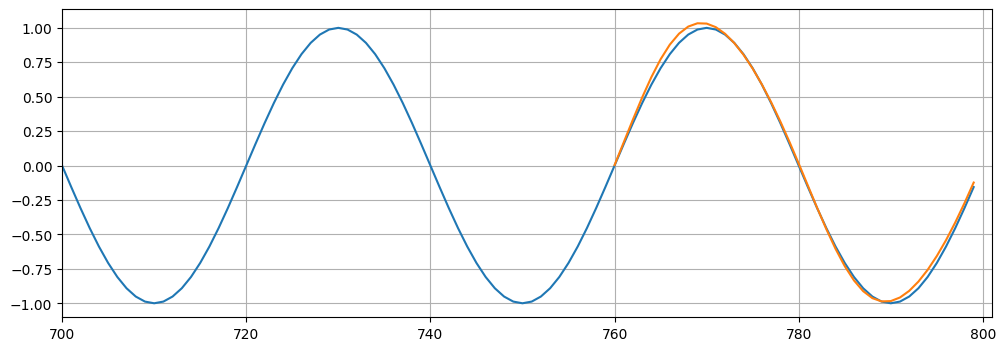

Epoch: 73 Loss: 0.00000981
Loss on test predictions: 0.0011156279360875487


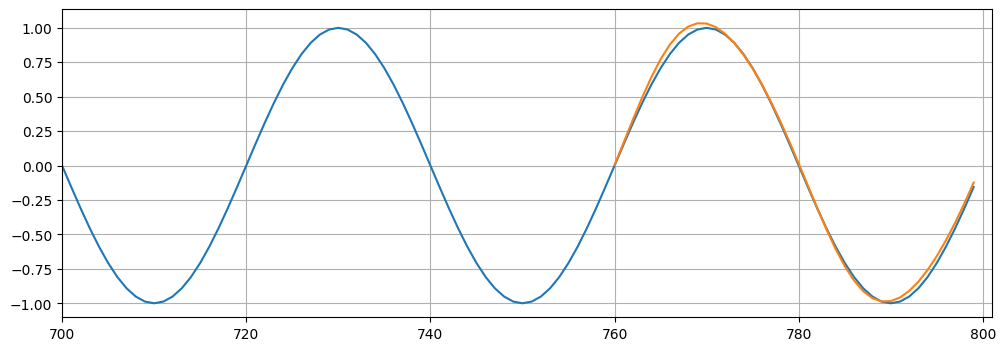

Epoch: 74 Loss: 0.00000962
Loss on test predictions: 0.0011076662922278047


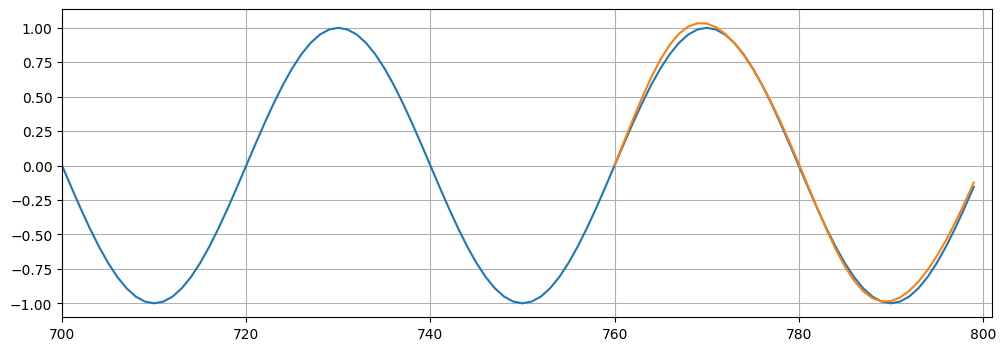

Epoch: 75 Loss: 0.00000944
Loss on test predictions: 0.001099808025173843


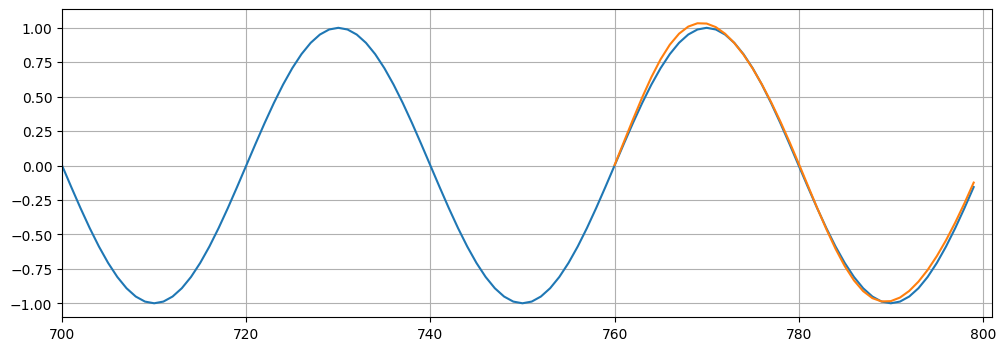

Epoch: 76 Loss: 0.00000926
Loss on test predictions: 0.0010920484783127904


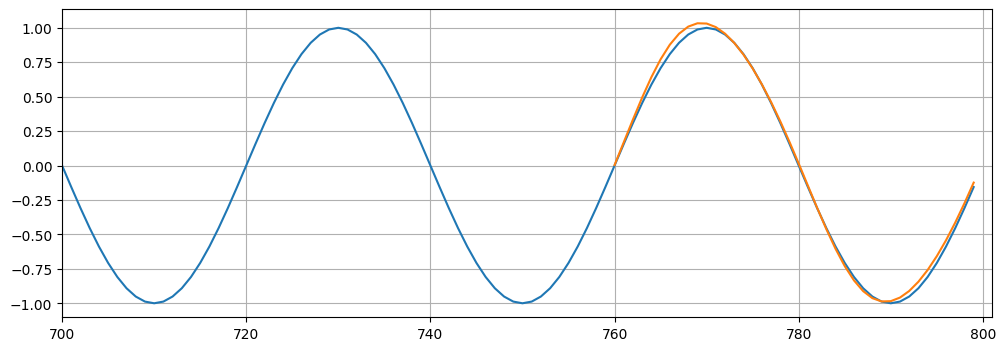

Epoch: 77 Loss: 0.00000908
Loss on test predictions: 0.0010844351490959525


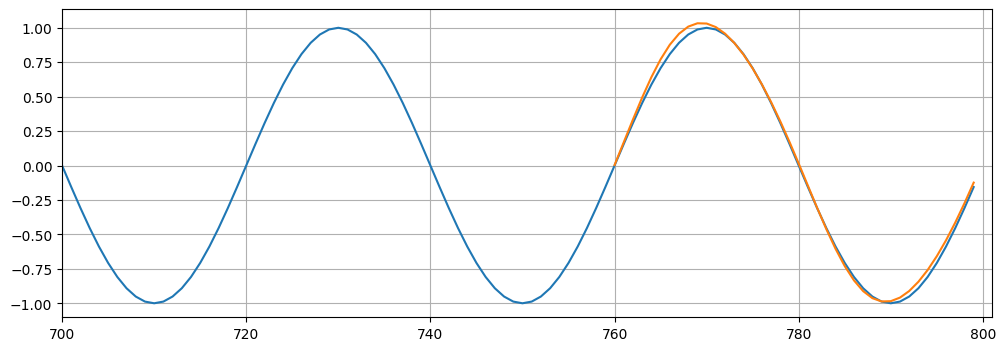

Epoch: 78 Loss: 0.00000892
Loss on test predictions: 0.001076915068551898


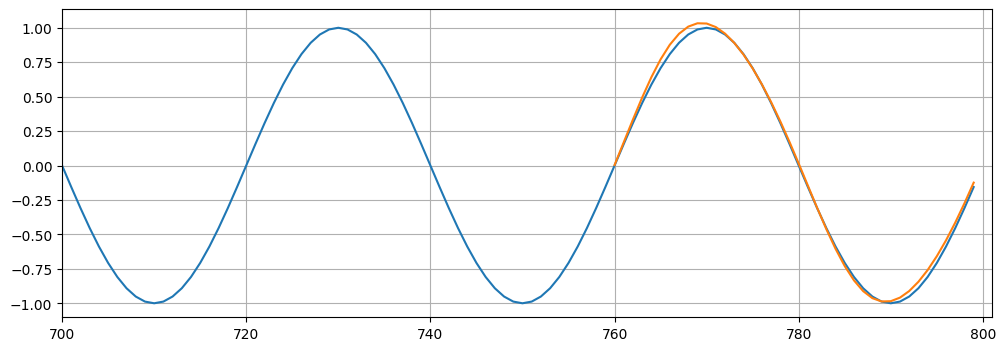

Epoch: 79 Loss: 0.00000875
Loss on test predictions: 0.001069485442712903


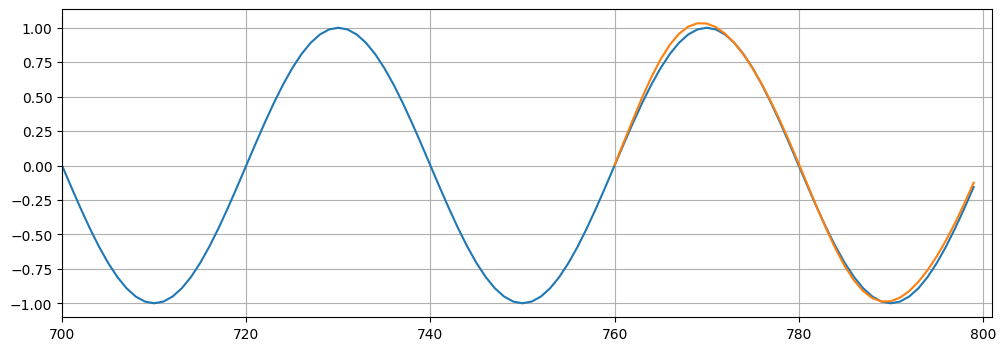

Epoch: 80 Loss: 0.00000859
Loss on test predictions: 0.001062161521986127


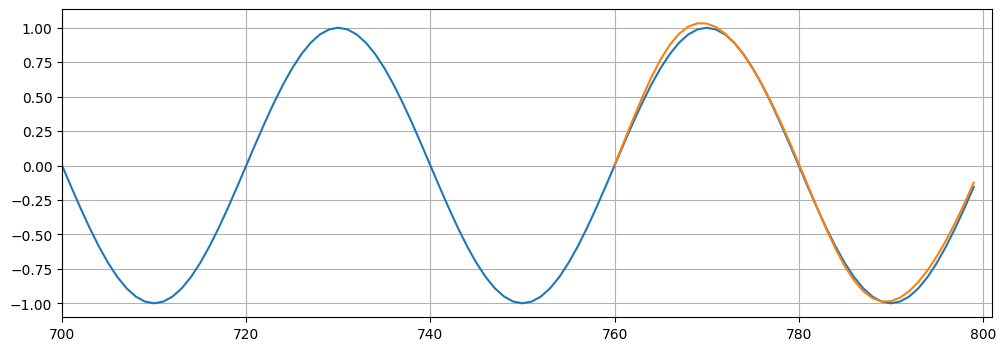

Epoch: 81 Loss: 0.00000844
Loss on test predictions: 0.0010549204889684916


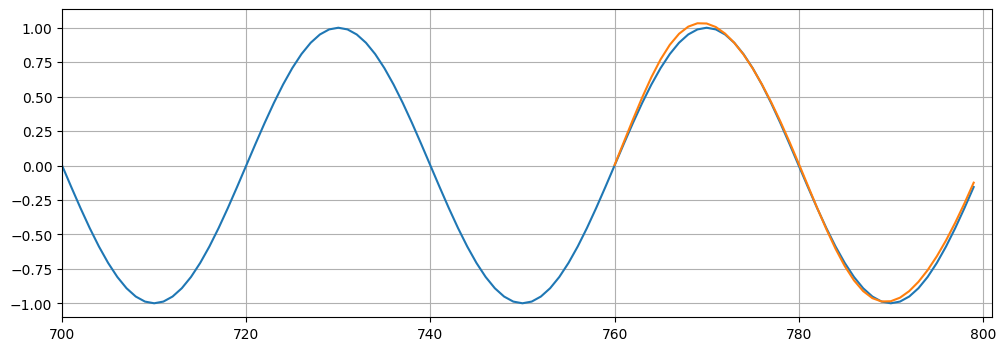

Epoch: 82 Loss: 0.00000829
Loss on test predictions: 0.0010477992473170161


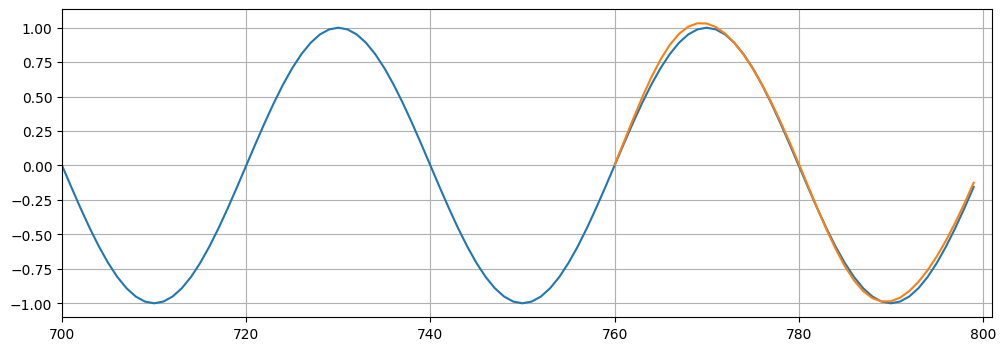

Epoch: 83 Loss: 0.00000814
Loss on test predictions: 0.0010407727677375078


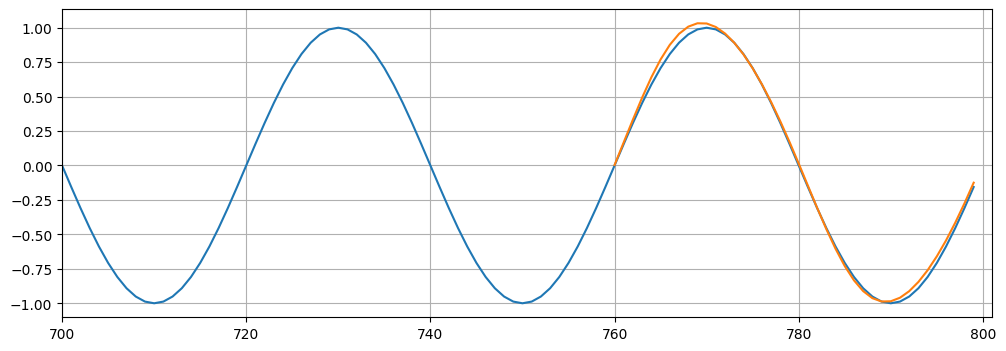

Epoch: 84 Loss: 0.00000800
Loss on test predictions: 0.0010338652646169066


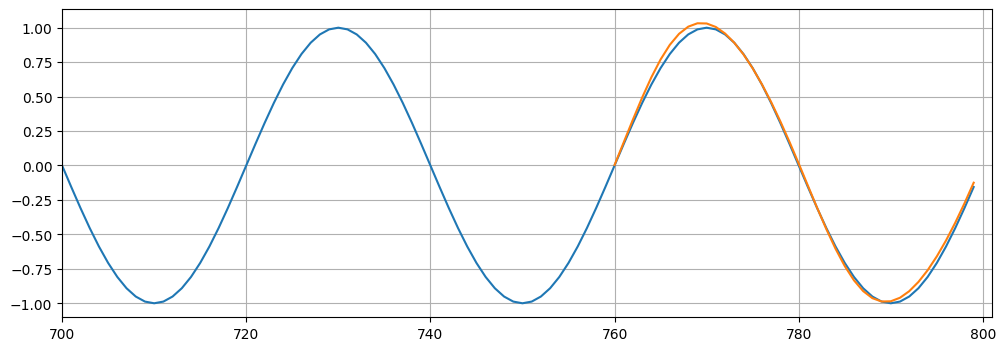

Epoch: 85 Loss: 0.00000786
Loss on test predictions: 0.0010270264465361834


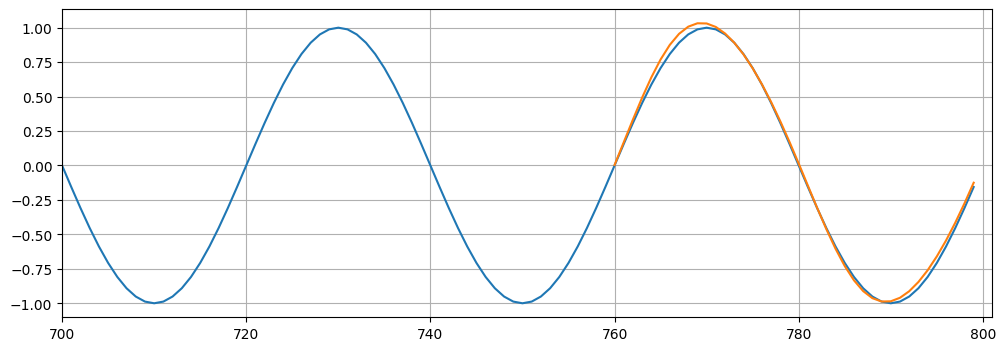

Epoch: 86 Loss: 0.00000772
Loss on test predictions: 0.0010202499106526375


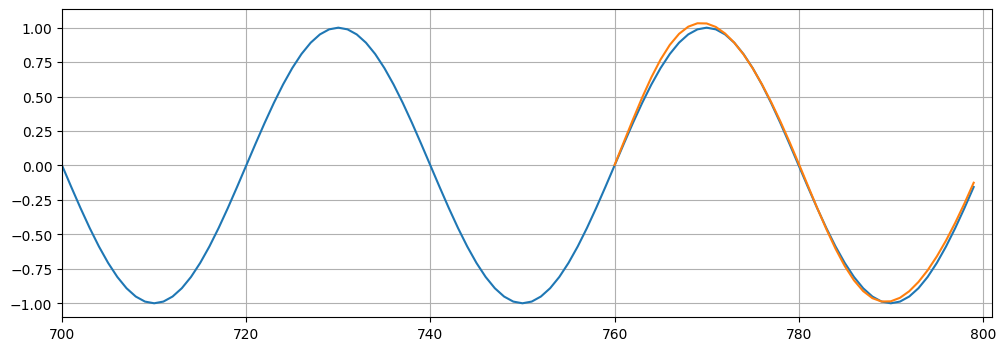

Epoch: 87 Loss: 0.00000759
Loss on test predictions: 0.001013588160276413


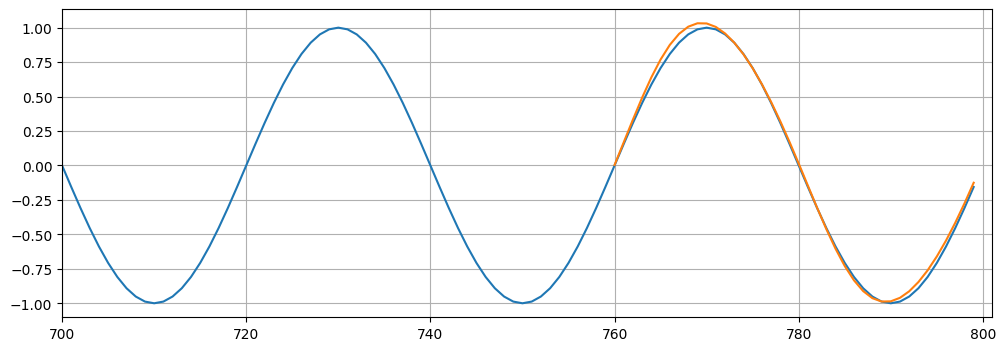

Epoch: 88 Loss: 0.00000746
Loss on test predictions: 0.001007033628411591


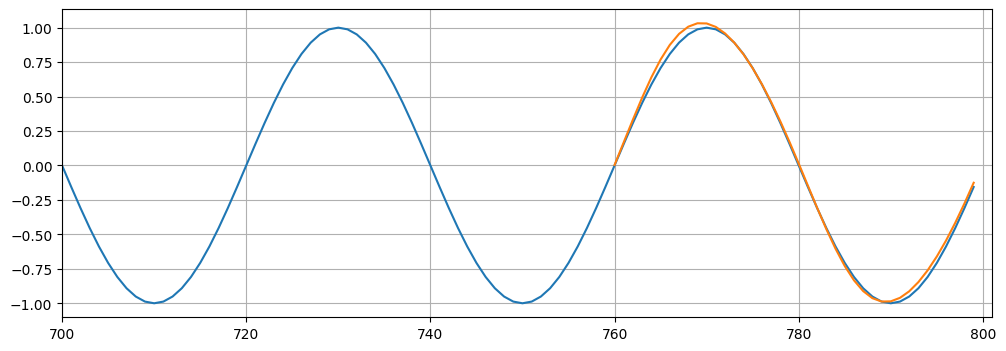

Epoch: 89 Loss: 0.00000734
Loss on test predictions: 0.0010005566291511059


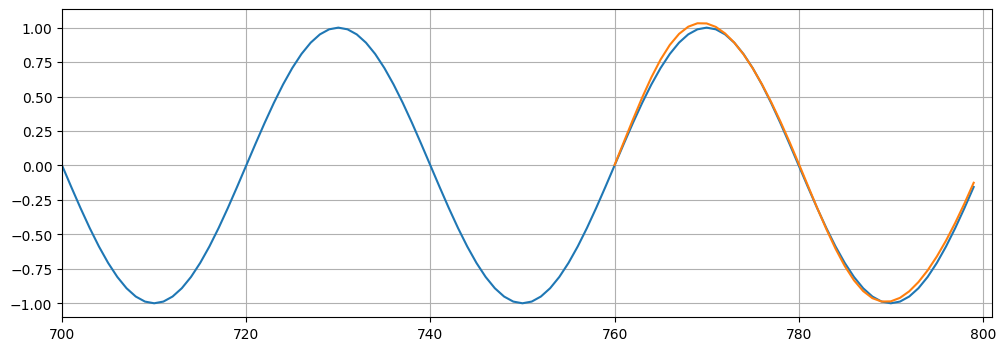

Epoch: 90 Loss: 0.00000721
Loss on test predictions: 0.0009941743919625878


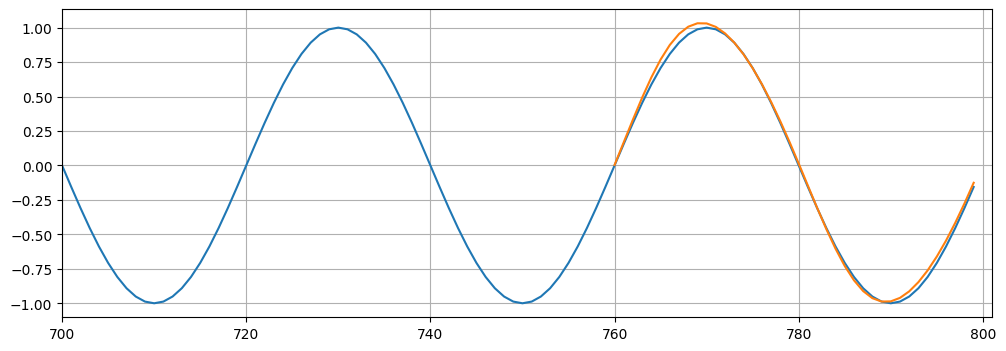

Epoch: 91 Loss: 0.00000709
Loss on test predictions: 0.0009878490818664432


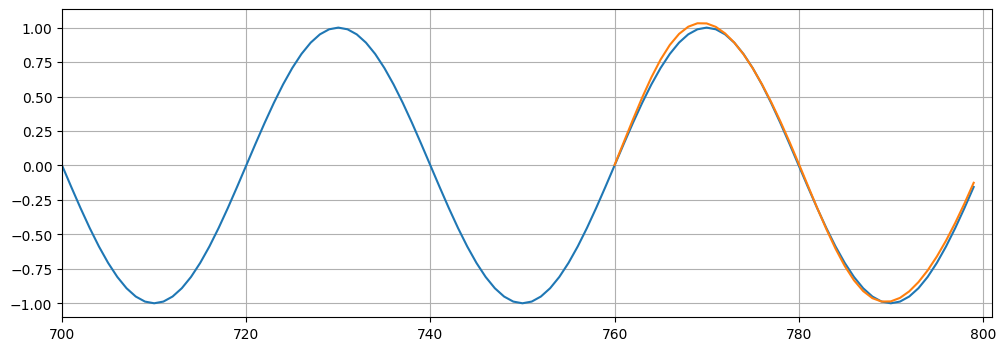

Epoch: 92 Loss: 0.00000698
Loss on test predictions: 0.000981622375547886


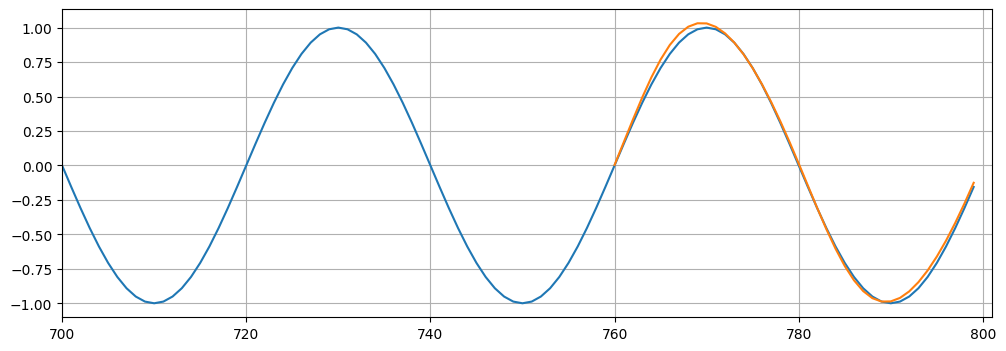

Epoch: 93 Loss: 0.00000686
Loss on test predictions: 0.0009754498605616391


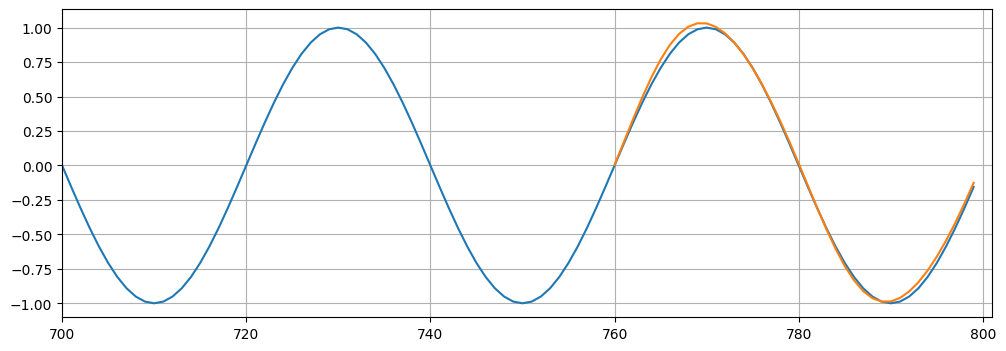

Epoch: 94 Loss: 0.00000675
Loss on test predictions: 0.00096938107162714


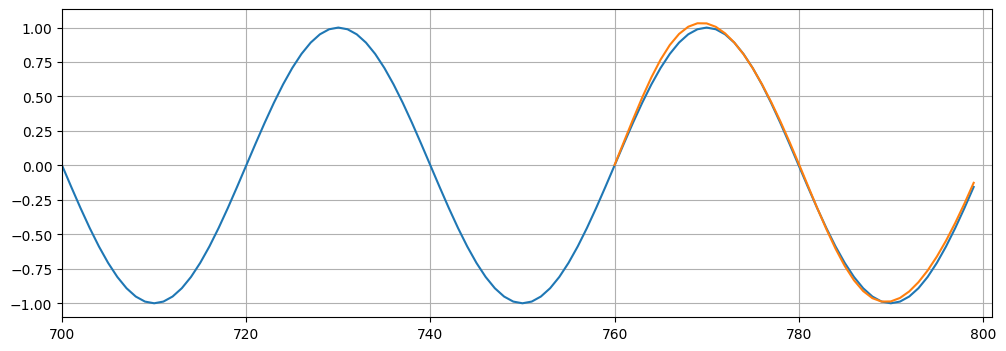

Epoch: 95 Loss: 0.00000664
Loss on test predictions: 0.0009633817826397717


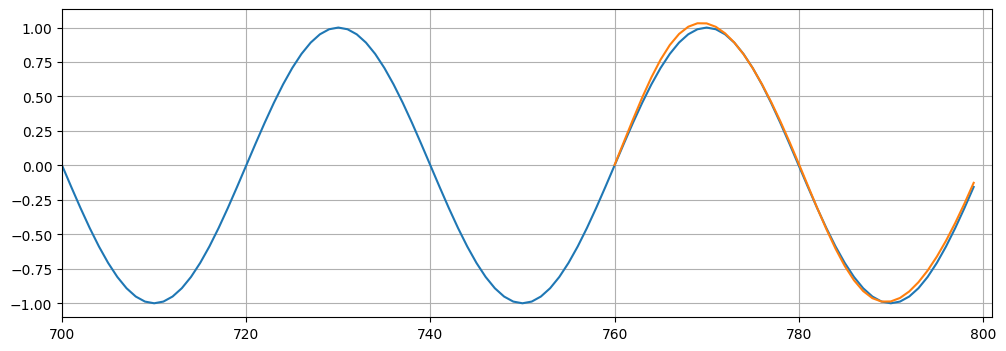

Epoch: 96 Loss: 0.00000654
Loss on test predictions: 0.0009574598516337574


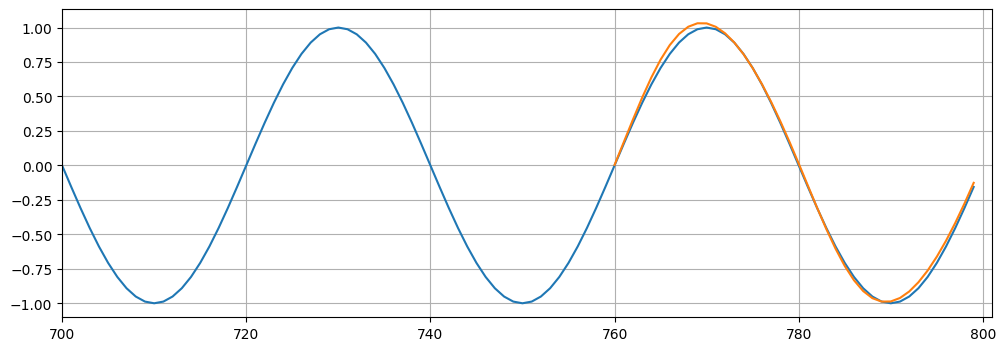

Epoch: 97 Loss: 0.00000643
Loss on test predictions: 0.0009516087593510747


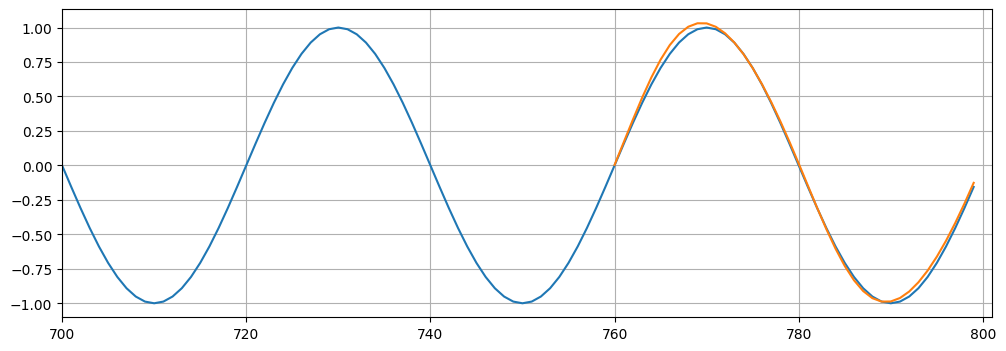

Epoch: 98 Loss: 0.00000633
Loss on test predictions: 0.0009458220447413623


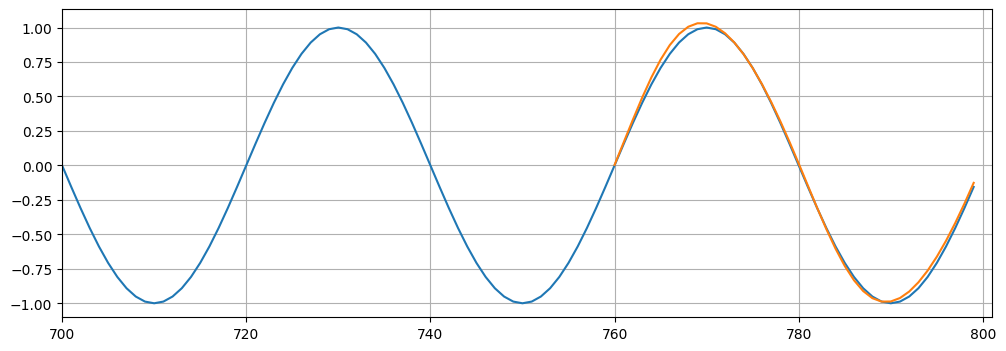

Epoch: 99 Loss: 0.00000623
Loss on test predictions: 0.0009400990675203502


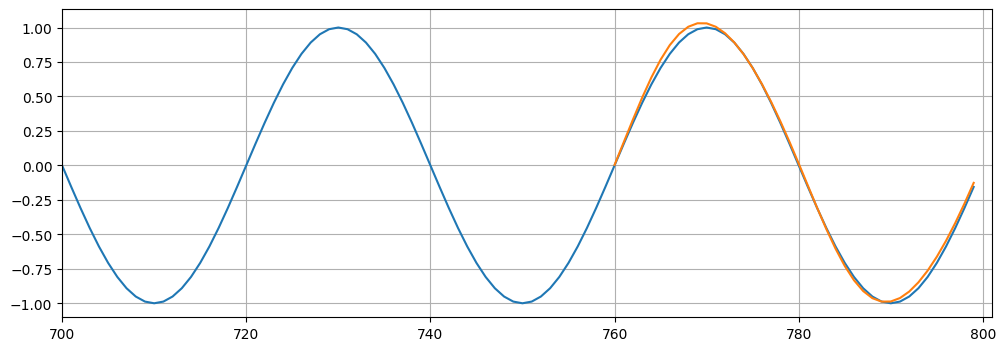

Epoch: 100 Loss: 0.00000614
Loss on test predictions: 0.000934464973397553


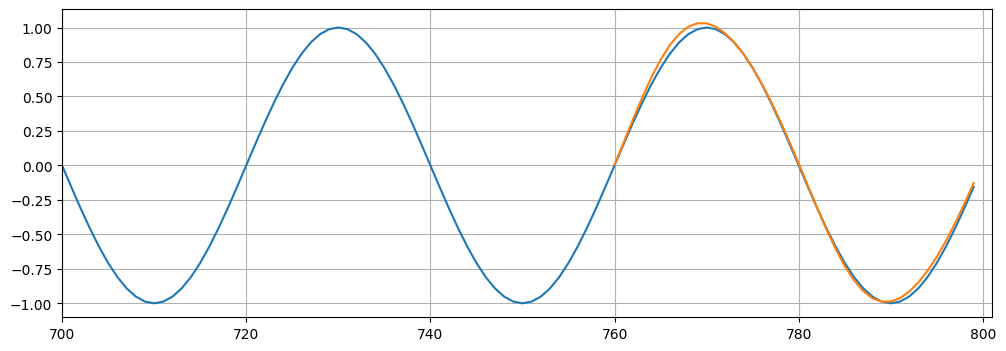

In [94]:
epochs = 100
future = 40

for i in range(epochs):
    
    # tuple-unpack the train_data set
    for seq, y_train in train_data:
        
        # reset the parameters and hidden states
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))
        
        y_pred = model(seq)
        
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
        
    # print training result
    print(f'Epoch: {i+1:2} Loss: {loss.item():10.8f}')
    
    # MAKE PREDICTIONS
    # start with a list of the last 10 training records
    preds = train_set[-window_size:].tolist()

    for f in range(future):  
        seq = torch.FloatTensor(preds[-window_size:])
        with torch.no_grad():
            model.hidden = (torch.zeros(1,1,model.hidden_size),
                            torch.zeros(1,1,model.hidden_size))
            preds.append(model(seq).item())
            
    loss = criterion(torch.tensor(preds[-window_size:]),y[760:])
    print(f'Loss on test predictions: {loss}')

    # Plot from point 700 to the end
    plt.figure(figsize=(12,4))
    plt.xlim(700,801)
    plt.grid(True)
    plt.plot(y.cpu().numpy())
    plt.plot(range(760,800),preds[window_size:])
    plt.show()